In [ ]:
try:
  %load_ext watermark
except:
  !pip install watermark
  %load_ext watermark

%watermark -a "Shashin Maharjan" -u -n -t -z

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.0 MB/s eta 0:00:00
Author: Shashin Maharjan

Last updated: Thu May 02 2024 18:14:59UTC



# SDOT - Vechicle Collision Data Analysis

![SDOT Collisions](https://images.unsplash.com/photo-1575987446487-56eba08666cf?ixlib=rb-1.2.1&auto=format&fit=crop&w=750&q=80)

Traffic accidents are a major global problem because they cause fatalities, property damage, injuries, and heavy financial loads. To explore the underlying factors behind these incidences, this study makes use of a vast dataset that includes important information regarding Road Traffic Accidents.

Data provided by the Seattle Department of Transportation (SDOT) on vehicle collisions along with its severity might be useful to derive insights and may show some pattern with the environmental factors like weather, road conditions etc.

This data analysis aims to identify patterns, correlations, and trends in traffic accidents through intensive data gathering, preprocessing, and visualization. By examining factors such as types of accidents, weather conditions, and vehicle movements, we can pinpoint the variables that significantly impact drivers' errors. This approach integrates data wrangling and exploratory data analysis (EDA) to enhance our understanding of the underlying causes of road incidents.

These results help to increase traffic safety by providing information for infrastructure development, targeted safety measures, and public awareness initiatives, all of which strive to make roads safer for everyone.

## 1. Download Data

[About Data](https://data.seattle.gov/dataset/SDOT-Collisions-All-Years/fqbw-79d9/about_data)

The data was uploaded on my personal drive for easy access.

In [ ]:
!gdown https://drive.google.com/uc?id=1wgB1crfC9HdLiFXse6a0JmoYsG4IKc4w

Downloading...
From (original): https://drive.google.com/uc?id=1wgB1crfC9HdLiFXse6a0JmoYsG4IKc4w
From (redirected): https://drive.google.com/uc?id=1wgB1crfC9HdLiFXse6a0JmoYsG4IKc4w&confirm=t&uuid=ba48dfea-834b-48ab-948e-bfaa4f522760
To: /content/SDOT_Collisions_All_Years.csv
100% 161M/161M [00:03<00:00, 40.9MB/s]


## 2. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. Load Data & Preview the Data

In [ ]:
# Load data
df = pd.read_csv("SDOT_Collisions_All_Years.csv", low_memory=False)

# View first 5 rows in a dataframe
df.head()

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added by User,Added date,Modified by,Modified date,x,y
0,6452334,System.Byte[],358378,359838,3881534,Matched,Block,NaN,E BOSTON ST BETWEEN 14TH AVE E AND 15TH AVE E,NaN,...,N,22-348398,PTCR,Police Traffic Collision Report,BRUKTAH,1/25/2023 12:00:00 AM,STATE INTERFACE,5/3/2023 12:00:00 AM,1.275366e+06,236187.648934
1,6452335,System.Byte[],361545,363025,ED30834,Matched,Intersection,29212.0,ARBORETUM DR E AND LAKE WASHINGTON BLVD E,NaN,...,N,2023-1318,PTCR,Police Traffic Collision Report,BRUKTAH,5/15/2023 12:00:00 AM,STATE INTERFACE,5/15/2023 12:00:00 AM,1.280244e+06,232549.364834
2,6452336,System.Byte[],369302,370782,EE40522,Unmatched,Block,NaN,S SPOKANE NR ST BETWEEN EAST MARGINAL ER WAY S...,NaN,...,Y,NaN,CVCR,Citizen Vehicle Collision Report,JOHNSOS1,2/5/2024 12:00:00 AM,NaN,NaN,1.268983e+06,212176.594893
3,6452337,System.Byte[],364691,366171,ED89238,Unmatched,Intersection,37367.0,AURORA AVE N AND N 85TH ST,NaN,...,N,NaN,CVCR,Citizen Vehicle Collision Report,ABAYNEH,8/25/2023 12:00:00 AM,ABAYNEH,8/25/2023 12:00:00 AM,1.268255e+06,255550.050490
4,6452338,System.Byte[],369626,371106,ED99265,Matched,Block,NaN,S MICHIGAN ST BETWEEN EAST MARGINAL WAY S AND ...,NaN,...,N,2023-262431,PTCR,Police Traffic Collision Report,ZUNIGAR1,2/15/2024 12:00:00 AM,STATE INTERFACE,2/15/2024 12:00:00 AM,1.270689e+06,202435.972355


In [ ]:
# View last 5 rows in a dataframe
df.tail()

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added by User,Added date,Modified by,Modified date,x,y
248320,6700654,System.Byte[],370715,372195,3837796,Unmatched,Block,NaN,S WILLOW ST BETWEEN CARLETON AVE S AND FLORA A...,NaN,...,Y,NaN,PTCR,Police Traffic Collision Report,JOHNSOS1,3/25/2024 12:00:00 AM,JOHNSOS1,3/25/2024 12:00:00 AM,1.272853e+06,200949.760514
248321,6700655,System.Byte[],370464,371944,EE55190,Unmatched,Intersection,32999.0,30TH AVE SW AND SW JUNEAU ST,NaN,...,Y,NaN,CVCR,Citizen Vehicle Collision Report,JOHNSOS1,3/15/2024 12:00:00 AM,NaN,NaN,1.260721e+06,204457.304453
248322,6700656,System.Byte[],370048,371528,3913809,Unmatched,Intersection,30540.0,SEATTLE BLVD S AND S DEARBORN ST,NaN,...,N,NaN,CVCR,Citizen Vehicle Collision Report,JOHNSOS1,3/4/2024 12:00:00 AM,JOHNSOS1,3/4/2024 12:00:00 AM,1.271606e+06,220992.684182
248323,6700657,System.Byte[],370825,372305,EE59843,Unmatched,Block,NaN,GREENWOOD AVE N BETWEEN N 36TH ST AND N 39TH ST,NaN,...,N,NaN,CVCR,Citizen Vehicle Collision Report,JOHNSOS1,3/28/2024 12:00:00 AM,NaN,NaN,1.265286e+06,242018.516012
248324,6700658,System.Byte[],370129,371609,EE40086,Matched,Intersection,30771.0,23RD AVE S AND S LANE ST,NaN,...,N,2023-264584,PTCR,Police Traffic Collision Report,ZUNIGAR1,3/6/2024 12:00:00 AM,STATE INTERFACE,3/6/2024 12:00:00 AM,1.278015e+06,221035.307670


In [ ]:
# View columns and check the shape of dataframe
df.columns, df.shape

(Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
        'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
        'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
        'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
        'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
        'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
        'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK',
        'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC',
        'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
        'Source of the collision report', 'Source description', 'Added by User',
        'Added date', 'Modified by', 'Modified date', 'x', 'y'],
       dtype='object'),
 (248325, 50))

In [ ]:
# View info(index dtype and columns, non-null values & memory usage) of loaded dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248325 entries, 0 to 248324
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   OBJECTID                        248325 non-null  int64  
 1   SE_ANNO_CAD_DATA                248325 non-null  object 
 2   INCKEY                          248325 non-null  int64  
 3   COLDETKEY                       248325 non-null  int64  
 4   REPORTNO                        248325 non-null  object 
 5   STATUS                          248325 non-null  object 
 6   ADDRTYPE                        244389 non-null  object 
 7   INTKEY                          82833 non-null   float64
 8   LOCATION                        243451 non-null  object 
 9   EXCEPTRSNCODE                   12795 non-null   object 
 10  EXCEPTRSNDESC                   12795 non-null   object 
 11  SEVERITYCODE                    248324 non-null  object 
 12  SEVERITYDESC    

In [ ]:
# view some basic statistical details
df.describe()

,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,STCOLCODE,SEGLANEKEY,CROSSWALKKEY,x,y
count,2.483250e+05,248325.000000,248325.000000,82833.000000,248325.000000,248325.000000,248325.000000,248325.000000,248325.000000,248325.000000,248325.000000,248324.000000,1.272050e+05,214640.000000,248325.000000,2.483250e+05,2.402390e+05,240239.000000
mean,6.576496e+06,167186.098717,167550.496474,38205.053735,2.237060,0.038880,0.027810,1.695504,0.374360,0.016780,0.001949,13.523908,7.971063e+06,22.687658,240.911374,8.741662e+03,1.271163e+06,229670.255703
std,7.168540e+04,106055.143200,106572.942551,54466.982259,1.442166,0.203697,0.165892,0.862173,0.726399,0.161478,0.047363,7.535533,2.611523e+06,14.672936,3105.644347,6.831932e+04,7.374172e+03,20613.900987
min,6.452334e+06,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000,0.000000e+00,1.248139e+06,184059.089009
25%,6.514415e+06,78370.000000,78370.000000,28667.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,11.000000,0.000000,0.000000e+00,1.266694e+06,213565.004431
50%,6.576496e+06,140844.000000,140844.000000,30102.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,8.033011e+06,15.000000,0.000000,0.000000e+00,1.271147e+06,228173.007774
75%,6.638577e+06,244873.000000,245473.000000,34082.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,32.000000,0.000000,0.000000e+00,1.276044e+06,245903.358960
max,6.700658e+06,371245.000000,372725.000000,858453.000000,93.000000,6.000000,3.000000,15.000000,78.000000,41.000000,5.000000,125.000000,1.307202e+07,88.000000,525241.000000,5.239700e+06,1.293052e+06,271525.414794


## [About SOTD Data](https://www.seattle.gov/documents/Departments/SDOT/GIS/Collisions_OD.pdf)

| Attribute         | Description                                                 |
|-------------------|-------------------------------------------------------------|
| OBJECTID          | ESRI unique identifier                                      |
| INCKEY            | A unique key for the incident                               |
| COLDETKEY         | Secondary key for the incident                               |
| ADDRTYPE          | Collision address type: __Alley__, __Block__, __Intersection__          |
| INTKEY            | Key that corresponds to the intersection associated with a collision |
| LOCATION          | Description of the general location of the collision         |
| EXCEPTRSNCODE     |                                                           |
| EXCEPTRSNDESC     |                                                           |
| SEVERITYCODE      | A code that corresponds to the severity of the collision: __`3`—fatality__, __`2b`—serious injury__, __`2`—injury__, __`1`—prop damage__, __`0`—unknown__ |
| SEVERITYDESC      | A detailed description of the severity of the collision     |
| COLLISIONTYPE     | Collision type                                              |
| PERSONCOUNT       | The total number of people involved in the collision        |
| PEDCOUNT          | The number of pedestrians involved in the collision         |
| PEDCYLCOUNT       | The number of bicycles involved in the collision            |
| VEHCOUNT          | The number of vehicles involved in the collision            |
| INJURIES          | The number of total injuries in the collision               |
| SERIOUSINJURIES  | The number of serious injuries in the collision             |
| FATALITIES        | The number of fatalities in the collision                   |
| INCDATE           | The date of the incident                                    |
| INCDTTM           | The date and time of the incident                           |
| JUNCTIONTYPE      | Category of junction at which collision took place          |
| SDOT_COLCODE      | A code given to the collision by SDOT                       |
| SDOT_COLDESC      | A description of the collision corresponding to the collision code |
| INATTENTIONIND    | Whether or not collision was due to inattention (Y/N)       |
| UNDERINFL         | Whether or not a driver involved was under the influence of drugs or alcohol |
| WEATHER           | A description of the weather conditions during the time of the collision |
| ROADCOND          | The condition of the road during the collision              |
| LIGHTCOND         | The light conditions during the collision                   |
| PEDROWNOTGRNT    | Whether or not the pedestrian right of way was not granted (Y/N) |
| SDOTCOLNUM        | A number given to the collision by SDOT                     |
| SPEEDING          | Whether or not speeding was a factor in the collision (Y/N) |
| ST_COLCODE        | A code provided by the state that describes the collision.   |
| ST_COLDESC        | A description that corresponds to the state’s coding designation |
| SEGLANEKEY        | A key for the lane segment in which the collision occurred  |
| CROSSWALKKEY      | A key for the crosswalk at which the collision occurred     |
| HITPARKEDCAR      | Whether or not the collision involved hitting a parked car (Y/N) |


## 4. Data Query Operation

In [ ]:
df[['OBJECTID', 'INCKEY', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE',
    'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
    'INJURIES',	'SERIOUSINJURIES', 'FATALITIES']]

,OBJECTID,INCKEY,ADDRTYPE,LOCATION,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
0,6452334,358378,Block,E BOSTON ST BETWEEN 14TH AVE E AND 15TH AVE E,1,Other,1,0,0,1,0,0,0
1,6452335,361545,Intersection,ARBORETUM DR E AND LAKE WASHINGTON BLVD E,1,Rear Ended,2,0,0,2,0,0,0
2,6452336,369302,Block,S SPOKANE NR ST BETWEEN EAST MARGINAL ER WAY S...,0,NaN,0,0,0,0,0,0,0
3,6452337,364691,Intersection,AURORA AVE N AND N 85TH ST,1,NaN,1,0,0,0,0,0,0
4,6452338,369626,Block,S MICHIGAN ST BETWEEN EAST MARGINAL WAY S AND ...,1,Sideswipe,3,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248320,6700654,370715,Block,S WILLOW ST BETWEEN CARLETON AVE S AND FLORA A...,1,NaN,1,0,0,0,0,0,0
248321,6700655,370464,Intersection,30TH AVE SW AND SW JUNEAU ST,0,NaN,0,0,0,0,0,0,0
248322,6700656,370048,Intersection,SEATTLE BLVD S AND S DEARBORN ST,1,NaN,1,0,0,0,0,0,0
248323,6700657,370825,Block,GREENWOOD AVE N BETWEEN N 36TH ST AND N 39TH ST,0,NaN,0,0,0,0,0,0,0


In [ ]:
df.iloc[6]    # iloc: index location

OBJECTID                                                                    6452340
SE_ANNO_CAD_DATA                                                      System.Byte[]
INCKEY                                                                       364562
COLDETKEY                                                                    366042
REPORTNO                                                                    ED88780
STATUS                                                                      Matched
ADDRTYPE                                                               Intersection
INTKEY                                                                      24652.0
LOCATION                                                 34TH AVE NE AND NE 75TH ST
EXCEPTRSNCODE                                                                   NaN
EXCEPTRSNDESC                                                                   NaN
SEVERITYCODE                                                                

In [ ]:
# Select 25th to 30th row and 2nd to 13th column in pandas dataframe
df.iloc[24:30, 1:13]

,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC
24,System.Byte[],364743,366223,3901883,Matched,Block,NaN,M L KING JR WR WAY S BETWEEN S ORCAS ST AND S ...,NaN,NaN,1,Property Damage Only Collision
25,System.Byte[],358413,359873,3916621,Matched,Block,NaN,15TH AVE S BETWEEN S BENNETT ST AND S LUCILE ST,NaN,NaN,2,Injury Collision
26,System.Byte[],364623,366103,ED85877,Matched,Block,NaN,15TH AVE S BETWEEN S HANFORD ST AND S HINDS ST,NaN,NaN,1,Property Damage Only Collision
27,System.Byte[],368963,370443,ED95935,Matched,Intersection,28616.0,2ND AVE W AND W ROY ST,NaN,NaN,2,Injury Collision
28,System.Byte[],358581,360041,3895161,Matched,Intersection,30145.0,19TH AVE AND E UNION ST,NaN,NaN,2,Injury Collision
29,System.Byte[],369194,370674,EE39042,Unmatched,Intersection,28035.0,BLAINE ST AND WESTLAKE AVE N,NaN,NaN,0,Unknown


| Severity Code | Description         |
|---------------|---------------------|
| 3             | Fatality            |
| 2b            | Serious Injury      |
| 2             | Injury              |
| 1             | Property Damage     |
| 0             | Unknown             |

In [ ]:
# Select rows with `SeverityCode` having Fatality
df[df['SEVERITYCODE'] == '3']

,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,HITPARKEDCAR,SPDCASENO,Source of the collision report,Source description,Added by User,Added date,Modified by,Modified date,x,y
561,6452895,System.Byte[],358570,360030,2017-027121,Unmatched,Intersection,486567.0,M L KING JR ER WAY S AND S OTHELLO ST,NaN,...,N,NaN,PTCR,Police Traffic Collision Report,ZUNIGAR1,2/1/2023 12:00:00 AM,ZUNIGAR1,2/1/2023 12:00:00 AM,1.282818e+06,199264.215680
671,6453005,System.Byte[],368749,370229,3908453,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN MERTON WAY S AND ...,NaN,...,N,NaN,PTCR,Police Traffic Collision Report,ZUNIGAR1,1/17/2024 12:00:00 AM,ZUNIGAR1,1/17/2024 12:00:00 AM,1.283217e+06,191270.396856
802,6453136,System.Byte[],358455,359915,3907296,Matched,Block,NaN,DEXTER AVE N BETWEEN THOMAS ST AND HARRISON ST,NaN,...,N,23-22231,PTCR,Police Traffic Collision Report,ZUNIGAR1,1/30/2023 12:00:00 AM,STATE INTERFACE,7/5/2023 12:00:00 AM,1.268289e+06,230342.678304
852,6453186,System.Byte[],368687,370167,3913662,Unmatched,Block,NaN,ELLIOTT AVE W BETWEEN 6TH AVE W AND W MERCER ST,NaN,...,N,NaN,PTCR,Police Traffic Collision Report,ZUNIGAR1,1/16/2024 12:00:00 AM,ZUNIGAR1,1/16/2024 12:00:00 AM,1.262700e+06,231428.590113
920,6453254,System.Byte[],364672,366152,3892930,Matched,Block,NaN,AIRPORT WAY S BETWEEN 8TH AVE S AND S LUCILE ST,NaN,...,N,2023-243896,PTCR,Police Traffic Collision Report,ZUNIGAR1,8/24/2023 12:00:00 AM,STATE INTERFACE,12/7/2023 12:00:00 AM,1.272994e+06,205478.786502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246840,6699174,System.Byte[],356295,357755,3902069,Matched,Block,NaN,ERSKINE WAY SW BETWEEN CALIFORNIA AVE SW AND L...,NaN,...,N,22-310827,PTCR,Police Traffic Collision Report,ZUNIGAR1,11/28/2022 12:00:00 AM,STATE INTERFACE,4/25/2023 12:00:00 AM,1.256782e+06,207809.202825
246969,6699303,System.Byte[],356387,357847,3898731,Matched,Block,NaN,AURORA AVE N BETWEEN GARFIELD ST AND HOWE ST,NaN,...,N,22-312341,PTCR,Police Traffic Collision Report,ZUNIGAR1,11/29/2022 12:00:00 AM,STATE INTERFACE,4/25/2023 12:00:00 AM,1.268114e+06,235184.849317
246983,6699317,System.Byte[],355867,357327,3893987,Matched,Block,NaN,AURORA AVE N BETWEEN N PHINNEY WAY AND N 46 UP...,NaN,...,N,22-299219,PTCR,Police Traffic Collision Report,JOHNSOS1,11/16/2022 12:00:00 AM,STATE INTERFACE,4/25/2023 12:00:00 AM,1.267353e+06,244944.632943
248026,6700360,System.Byte[],370055,371535,3928378,Unmatched,Block,NaN,15TH AVE NW BETWEEN NW 83RD ST AND NW 85TH ST,NaN,...,N,NaN,PTCR,Police Traffic Collision Report,ZUNIGAR1,3/4/2024 12:00:00 AM,ZUNIGAR1,3/4/2024 12:00:00 AM,1.260300e+06,255380.617786


In [ ]:
# Select all rows and columns
# ['LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
# 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',	'SERIOUSINJURIES', 'FATALITIES']
# which have Property Damage as `SeverityCode`

df.loc[df['SEVERITYCODE'] == '1',
   ['LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
    'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',	'SERIOUSINJURIES', 'FATALITIES']]

,LOCATION,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
0,E BOSTON ST BETWEEN 14TH AVE E AND 15TH AVE E,1,Other,1,0,0,1,0,0,0
1,ARBORETUM DR E AND LAKE WASHINGTON BLVD E,1,Rear Ended,2,0,0,2,0,0,0
3,AURORA AVE N AND N 85TH ST,1,NaN,1,0,0,0,0,0,0
4,S MICHIGAN ST BETWEEN EAST MARGINAL WAY S AND ...,1,Sideswipe,3,0,0,2,0,0,0
5,QUEEN ANNE AVE N BETWEEN CROCKETT ST AND BOSTO...,1,Parked Car,2,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
248318,NE 85TH ST BETWEEN 36TH AVE NE AND 38TH W AVE NE,1,NaN,2,0,0,0,0,0,0
248319,RAINIER AVE S BETWEEN S ROSE S ST AND S THISTL...,1,NaN,2,0,0,0,0,0,0
248320,S WILLOW ST BETWEEN CARLETON AVE S AND FLORA A...,1,NaN,1,0,0,0,0,0,0
248322,SEATTLE BLVD S AND S DEARBORN ST,1,NaN,1,0,0,0,0,0,0


In [ ]:
# Select all those accidents based on:
# no. of pedestrains involved>=2 &
# no. of vechicles involved>=1 &
# no. of injuries>=3 || no. of fatalitites >=1

# First convert above columns values into int from string
columns = ['PEDCOUNT', 'VEHCOUNT', 'INJURIES', 'FATALITIES']
for column in columns:
  df[column] = df[column].astype(int)

# Filtering accidents based on above mentioned conditions
filtered_accidents = df.loc[(df['PEDCOUNT']>=2) & (df['VEHCOUNT']>0) & ((df['INJURIES']>2) | (df['FATALITIES']>=1)),
                            ['ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
                             'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES']]

filtered_accidents.sample(5)

,ADDRTYPE,LOCATION,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
106588,Intersection,BELL ST AND ELLIOTT AVE,2,Pedestrian,5,3,0,1,3,0,0
213695,Block,MADISON ST BETWEEN 2ND AVE AND 3RD AVE,2,Other,5,4,0,1,4,0,0
42716,Block,1ST AVE BETWEEN BLANCHARD ST AND BELL ST,2,Pedestrian,4,3,0,1,3,0,0
203141,Intersection,5TH AVE AND DENNY WAY,2,Angles,6,2,0,3,4,0,0
105865,Block,N 36TH ST BETWEEN PHINNEY AVE N AND FRANCIS AVE N,2,Pedestrian,8,6,0,1,6,0,0


In [ ]:
filtered_accidents.shape

(55, 11)

## 5. Data Wrangling


In [ ]:
# Check duplicated values
df.duplicated(), df.duplicated().sum()

(0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 248320    False
 248321    False
 248322    False
 248323    False
 248324    False
 Length: 248325, dtype: bool,
 0)

In [ ]:
# Check missing values
df.isnull().sum()

OBJECTID                               0
SE_ANNO_CAD_DATA                       0
INCKEY                                 0
COLDETKEY                              0
REPORTNO                               0
STATUS                                 0
ADDRTYPE                            3936
INTKEY                            165492
LOCATION                            4874
EXCEPTRSNCODE                     235530
EXCEPTRSNDESC                     235530
SEVERITYCODE                           1
SEVERITYDESC                           0
COLLISIONTYPE                      33685
PERSONCOUNT                            0
PEDCOUNT                               0
PEDCYLCOUNT                            0
VEHCOUNT                               0
INJURIES                               0
SERIOUSINJURIES                        0
FATALITIES                             0
INCDATE                                0
INCDTTM                                0
JUNCTIONTYPE                       13005
SDOT_COLCODE    

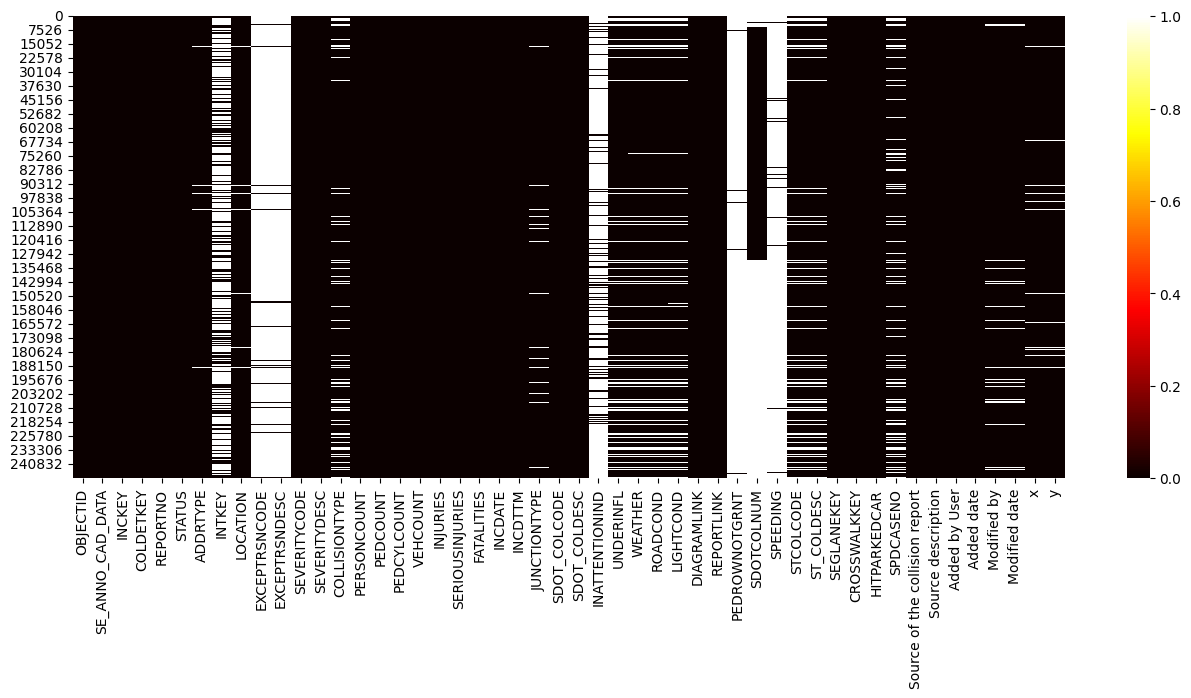

In [ ]:
# Visualize missing values using heatmaps
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cmap='hot')
plt.show();

> Given that the dataset contains significant no. of missing values, it is reasonable to assume that data from columns with more than __30%__ missing values can be safely removed.

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Define threshold and filter columns that exceed threshold except SPEEDING column then remove it
threshold = 30
columns_to_remove = missing_percentage[(missing_percentage > threshold) & (missing_percentage.index != 'SPEEDING')].index.tolist()
df = df.drop(columns=columns_to_remove)

print(f"Removed {len(columns_to_remove)} columns after removal:\n{columns_to_remove}")
print(f"\nRemaining {len(df.columns)} columns after removal:\n{df.columns}")

Removed 6 columns after removal:
['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM']

Remaining 44 columns after removal:
Index(['OBJECTID', 'SE_ANNO_CAD_DATA', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK', 'REPORTLINK', 'SPEEDING',
       'STCOLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR',
       'SPDCASENO', 'Source of the collision report', 'Source description',
       'Added by User', 'Added date', 'Modified by', 'Modified date', 'x',
       'y'],
      dtype='object')


In [ ]:
# Checking missing values again
df.isnull().sum()

OBJECTID                               0
SE_ANNO_CAD_DATA                       0
INCKEY                                 0
COLDETKEY                              0
REPORTNO                               0
STATUS                                 0
ADDRTYPE                            3936
LOCATION                            4874
SEVERITYCODE                           1
SEVERITYDESC                           0
COLLISIONTYPE                      33685
PERSONCOUNT                            0
PEDCOUNT                               0
PEDCYLCOUNT                            0
VEHCOUNT                               0
INJURIES                               0
SERIOUSINJURIES                        0
FATALITIES                             0
INCDATE                                0
INCDTTM                                0
JUNCTIONTYPE                       13005
SDOT_COLCODE                           1
SDOT_COLDESC                           1
UNDERINFL                          33667
WEATHER         

In [ ]:
columns_to_remove = ["INCKEY",            # Unique Key for the incident
                     "SE_ANNO_CAD_DATA",  # Contains every values as `System.Byte[]`
                     "REPORTNO",          # Irrelevant
                     "STATUS",
                     "Added by User",
                     "Modified by",
                     "Added date",
                     "Modified date"]

df = df.drop(columns=columns_to_remove)
print(f"Remaining {len(df.columns)} columns after removal:\n{df.columns}")

Remaining 36 columns after removal:
Index(['OBJECTID', 'COLDETKEY', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DIAGRAMLINK',
       'REPORTLINK', 'SPEEDING', 'STCOLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR', 'SPDCASENO',
       'Source of the collision report', 'Source description', 'x', 'y'],
      dtype='object')


## 6. Univariative Analysis



In [ ]:
def visualize_pie_chart(series, title):
  """ Univariative pie chart plots """
  # Get unique values and their counts
  value_counts = series.value_counts()

  plt.figure(figsize=(6, 6))
  plt.pie(value_counts, labels=None, autopct='%1.1f%%', startangle=140)  # Hide labels
  plt.title(title)
  plt.legend(value_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))
  plt.show()

def visualize_bar_plot(series, title, rotation=None):
  """ Univariative bar plots """
  # Filter the dataframe for specific column values with their respective counts
  filter_df = series.value_counts().reset_index()
  color_palette = sns.color_palette("deep", len(filter_df))

  sns.barplot(data=filter_df, x=filter_df.columns[0], y=filter_df.columns[1], hue=filter_df.columns[0], palette=color_palette, legend=False)
  plt.title(title)
  plt.xticks(rotation=rotation)
  plt.show()

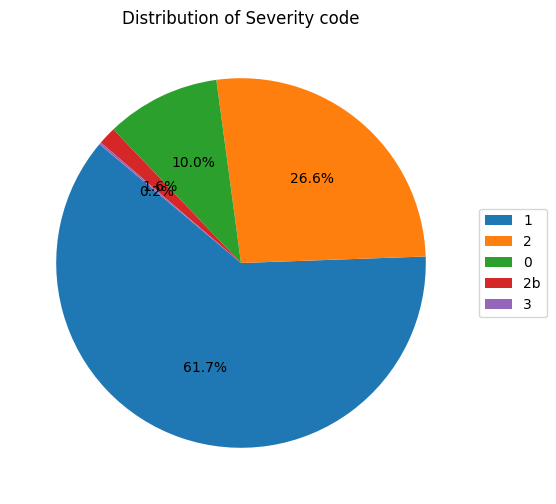

In [ ]:
# Visualization on distribution of SEVERITYCODE
visualize_pie_chart(df["SEVERITYCODE"], "Distribution of Severity code")

| Severity Code | Description         |
|---------------|---------------------|
| 3             | Fatality            |
| 2b            | Serious Injury      |
| 2             | Injury              |
| 1             | Property Damage     |
| 0             | Unknown             |

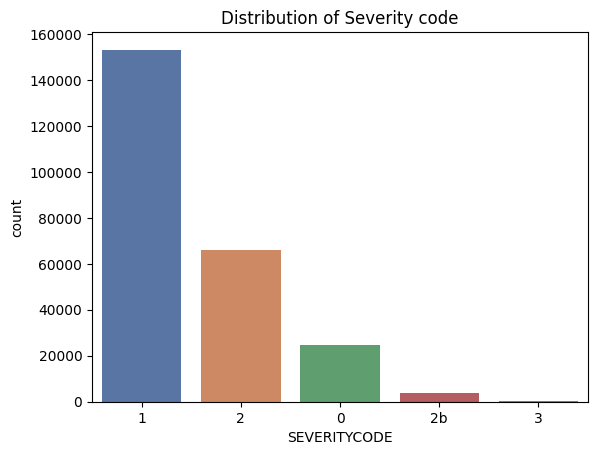

In [ ]:
visualize_bar_plot(df["SEVERITYCODE"], "Distribution of Severity code")

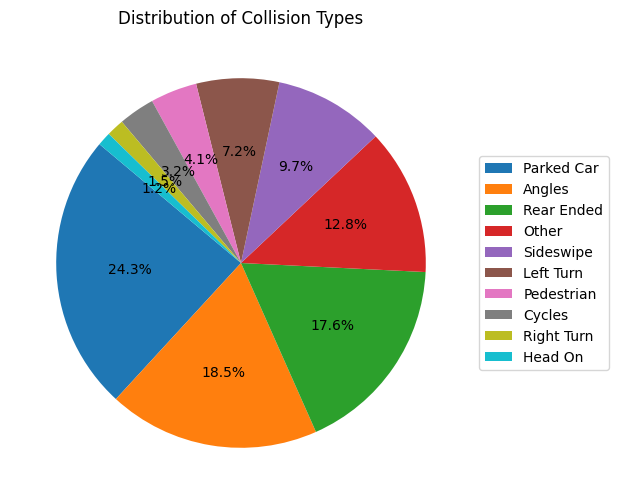

In [ ]:
# Visualization on distribution of COLLISIONTYPE
visualize_pie_chart(df["COLLISIONTYPE"], "Distribution of Collision Types")

In [ ]:
sns.set(style="darkgrid")

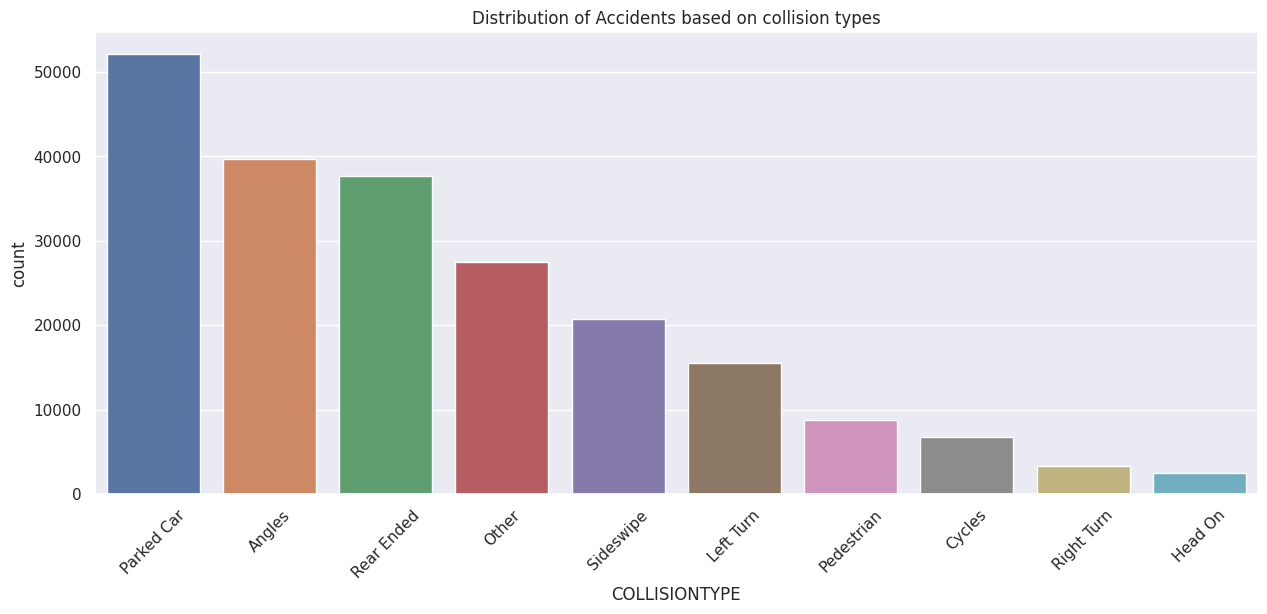

In [ ]:
plt.figure(figsize=(15, 6))
visualize_bar_plot(df["COLLISIONTYPE"], "Distribution of Accidents based on collision types", 45)

In [ ]:
df['ADDRTYPE'].value_counts()

ADDRTYPE
Block           160618
Intersection     82833
Alley              938
Name: count, dtype: int64

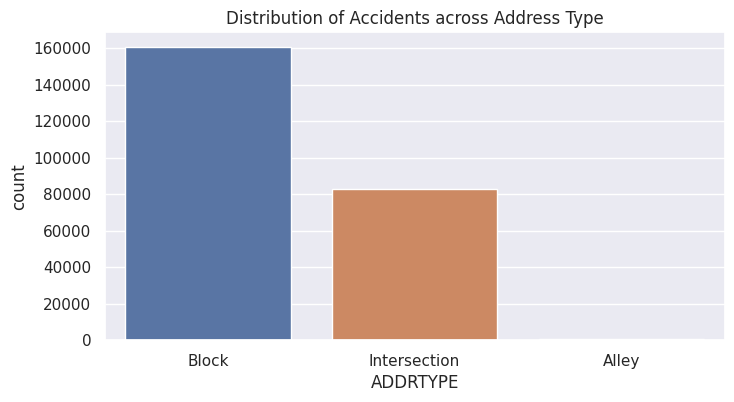

In [ ]:
plt.figure(figsize=(8, 4))
visualize_bar_plot(df["ADDRTYPE"], "Distribution of Accidents across Address Type")

In [ ]:
df["INCDATE"]

0         12/31/2022 12:00:00 AM
1           1/2/2023 12:00:00 AM
2          1/15/2024 12:00:00 AM
3          8/12/2023 12:00:00 AM
4          9/10/2023 12:00:00 AM
                   ...          
248320     3/17/2024 12:00:00 AM
248321     2/29/2024 12:00:00 AM
248322    11/18/2023 12:00:00 AM
248323     3/16/2024 12:00:00 AM
248324     9/12/2023 12:00:00 AM
Name: INCDATE, Length: 248325, dtype: object

In [ ]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'], errors='coerce')
print(df['INCDATE'].dtype)
df['INCDATE']

<ipython-input-31-a4bc57f58ec5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['INCDATE'] = pd.to_datetime(df['INCDATE'], errors='coerce')


datetime64[ns]


0        2022-12-31
1        2023-01-02
2        2024-01-15
3        2023-08-12
4        2023-09-10
            ...    
248320   2024-03-17
248321   2024-02-29
248322   2023-11-18
248323   2024-03-16
248324   2023-09-12
Name: INCDATE, Length: 248325, dtype: datetime64[ns]

In [ ]:
df["MONTH"] = df["INCDATE"].dt.month
df["YEAR"] = df["INCDATE"].dt.year

df["MONTH"]

0         12
1          1
2          1
3          8
4          9
          ..
248320     3
248321     2
248322    11
248323     3
248324     9
Name: MONTH, Length: 248325, dtype: int32

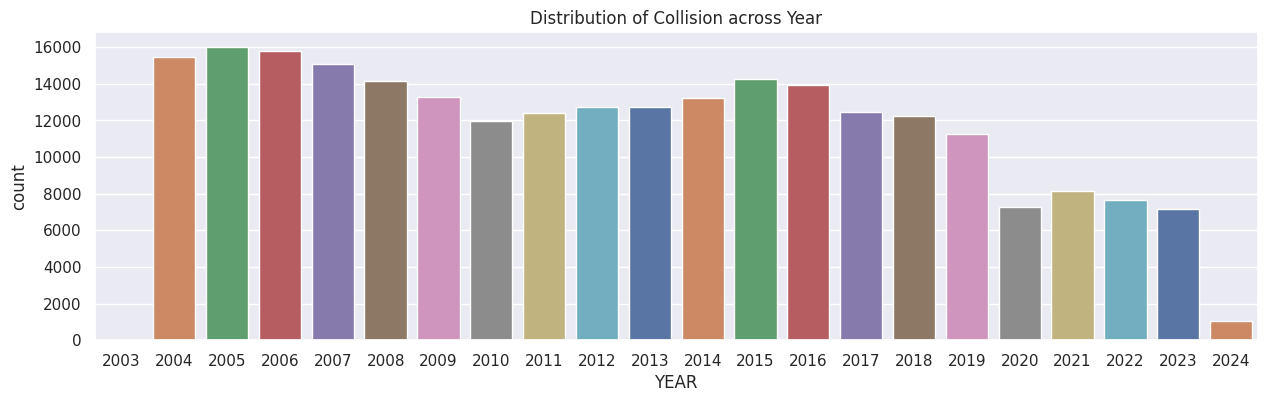

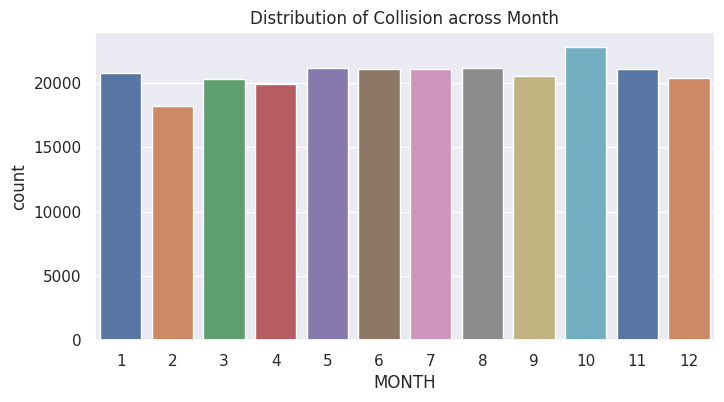

In [ ]:
plt.figure(figsize=(15, 4))
visualize_bar_plot(df["YEAR"], "Distribution of Collision across Year")
plt.figure(figsize=(8, 4))
visualize_bar_plot(df["MONTH"], "Distribution of Collision across Month")

> The no. of collision accidents doesn't show a clear trend till 2019, but after __2019__ there's a slight decrease. This could be due to better _awareness among drivers_, _improved road safety measures_, _better brake systems_, and _stricter enforcement of traffic rules_.

>__Note:__ The dataset is up to date until 2024, reflecting ongoing trends and patterns in collision accidents. As such, any analysis or conclusions drawn from this data should be considered in the context of the current year.


## 7. Bivariate and Multivariate analysis

Since, we have time of accident as well, in order to analyse timewise, splitting the data into 6 categories wise:  
- Late Night
- Early Morning
- Morning
- Noon
- Eve
- Night

In [ ]:
# Convert 'INCDTTM' column to time format
df["INCTIME"] = pd.to_datetime(df["INCDTTM"], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df = df.dropna(subset=['INCTIME'])    # Filter out invalid or missing time values

# Define bins and labels for time of day categorization
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']

# Categorize time of day using pd.cut
df = df.copy()
df.loc[:, "TIMEOFDAY"] = pd.cut(df["INCTIME"].dt.hour, bins=bins, labels=labels, include_lowest=True)

df["TIMEOFDAY"]

0            Late Night
1               Morning
4                  Noon
5               Evening
6               Evening
              ...      
248310    Early Morning
248314          Evening
248316          Evening
248317          Evening
248324          Morning
Name: TIMEOFDAY, Length: 188523, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night']

In [ ]:
df_time = pd.DataFrame({'TIME' : ['00:00 to 04:00',
                                  '04:00 to 08:00',
                                  '08:00 to 12:00',
                                  '12:00 to 16:00',
                                  '16:00 to 20:00',
                                  '20:00 to 00:00']},index=['Late Night','Early Morning',
                                                            'Morning','Noon','Eve','Night'])
df_time

,TIME
Late Night,00:00 to 04:00
Early Morning,04:00 to 08:00
Morning,08:00 to 12:00
Noon,12:00 to 16:00
Eve,16:00 to 20:00
Night,20:00 to 00:00


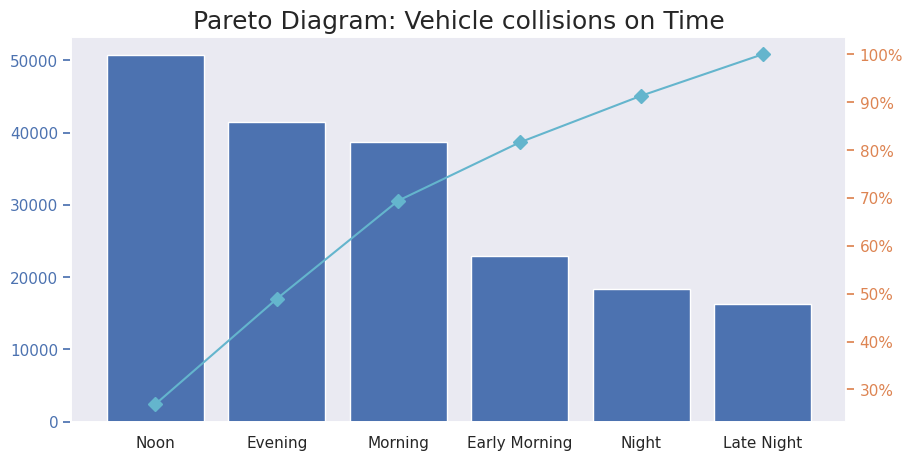

In [ ]:
import matplotlib.ticker as ticker
sns.set(style="dark")

df_TOD = pd.DataFrame(df['OBJECTID'].groupby(df['TIMEOFDAY'].astype('object')).count())
df_TOD = df_TOD.sort_values(by='OBJECTID', ascending=False)
df_TOD["cumpercentage"] = df_TOD["OBJECTID"].cumsum() / df_TOD["OBJECTID"].sum() * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.bar(df_TOD.index, df_TOD["OBJECTID"], zorder=1)  # Setting zorder for the bar plot
ax2.plot(df_TOD.index, df_TOD["cumpercentage"], color="C9", marker="D", ms=7, zorder=2)  # Setting zorder for the line plot
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.title("Pareto Diagram: Vehicle collisions on Time", fontsize=18)
plt.show()

According to the chart, the most collisions happen during the day, with the highest number occurring at noon. There is a significant drop-off in collisions in the late afternoon and evening, and the fewest collisions happen at night.

>According to the chart, we can see that most collisions happen during the day, with the highest number occurring at noon i.e. between __`12:00` P.M.__ to __`8:00` P.M.__

In [ ]:
def visualize_collision_counts(df, x_variable, hue_variable, title, horizontal=False):
  fig, ax = plt.subplots(figsize=(15, 5) if not horizontal else (10, 5))

  if not horizontal:
      sns.countplot(data=df, x=x_variable, hue=hue_variable, ax=ax)
  else:
      sns.countplot(data=df, y=x_variable, hue=hue_variable, ax=ax)

  ax.set_title(title, fontsize=18)
  ax.set_xlabel(x_variable if not horizontal else 'Count', fontsize=14)
  ax.set_ylabel("Count" if not horizontal else x_variable, fontsize=14)
  plt.legend(title=hue_variable, fontsize=10)
  plt.tight_layout()
  plt.show()

def visualize_collision_pie_chart(df, x_variable, hue_variable, title, pie_radius=1):
  counts = df.groupby([x_variable, hue_variable]).size().unstack(fill_value=0)

  num_categories = len(counts.index)
  fig, axes = plt.subplots(1, num_categories, figsize=(5*num_categories, 6))

  # Pie chart for each category in x_variable
  for i, category in enumerate(counts.index):
    ax = axes[i] if num_categories > 1 else axes
    ax.pie(counts.loc[category], labels=counts.columns, autopct='%1.1f%%', startangle=140, radius=pie_radius,
               textprops={'fontsize': 18})
    ax.set_xlabel(category, fontsize=20)

  fig.suptitle(title, fontsize=20)
  plt.tight_layout()
  plt.show()

In [ ]:
pd.crosstab(df.TIMEOFDAY, df.SEVERITYCODE)

SEVERITYCODE,0,1,2,2b,3
TIMEOFDAY,,,,,
Late Night,0,12103,3730,420,72
Early Morning,0,15332,7180,389,46
Morning,4,26799,11289,527,52
Noon,1,33590,16206,829,79
Evening,0,27087,13507,829,85
Night,0,12934,4977,394,61


In [ ]:
pd.crosstab(df.TIMEOFDAY, df.SEVERITYDESC)

SEVERITYDESC,Fatality Collision,Injury Collision,Property Damage Only Collision,Serious Injury Collision,Unknown
TIMEOFDAY,,,,,
Late Night,72,3730,12103,420,0
Early Morning,46,7180,15332,389,1
Morning,52,11289,26799,527,4
Noon,79,16206,33590,829,1
Evening,85,13507,27087,829,0
Night,61,4977,12934,394,0


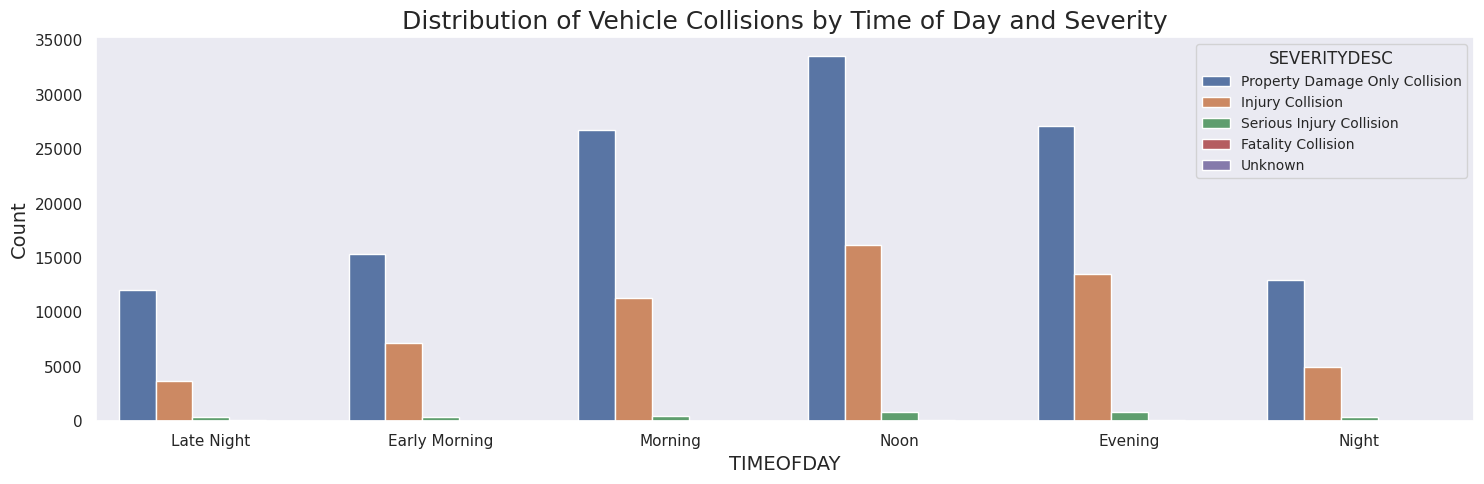

In [ ]:
visualize_collision_counts(df, "TIMEOFDAY", "SEVERITYDESC", "Distribution of Vehicle Collisions by Time of Day and Severity")

> - Most crashes happen during the day, with afternoons seeing the highest number.
- Nighttime has the fewest crashes overall.

Even though severe crashes are less common, they follow a similar pattern, happening most in afternoon.

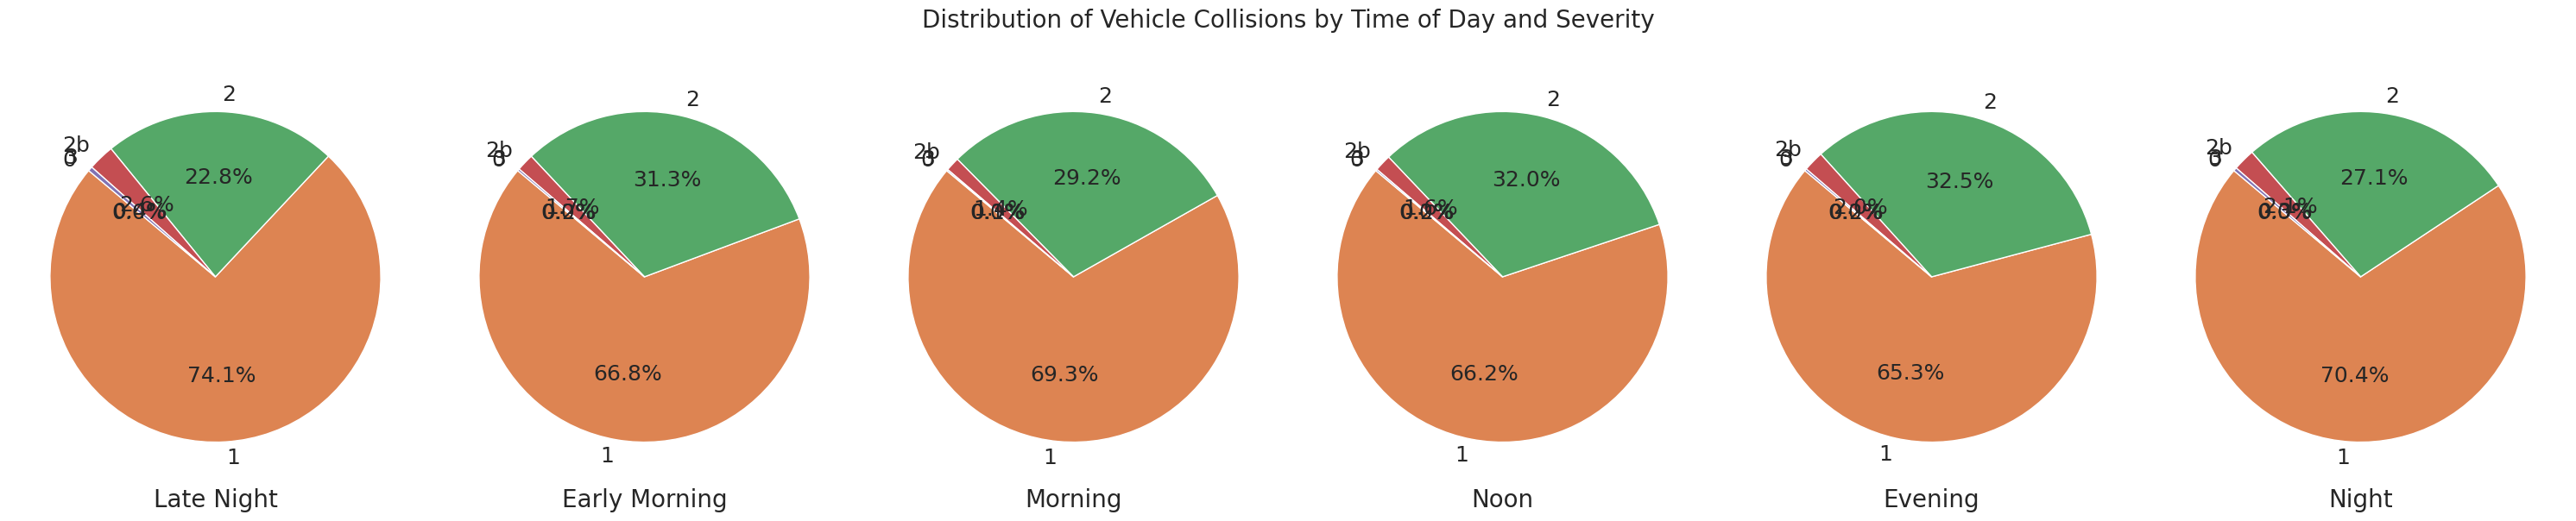

In [ ]:
visualize_collision_pie_chart(df, "TIMEOFDAY", "SEVERITYCODE", "Distribution of Vehicle Collisions by Time of Day and Severity")

Following insights can be gained from this pie chart:
- The largest slice corresponds to __property damage collisions__ then followed by injury collisions, fatality collisions, serious injuries related collisions and fatality collisions.
- The unknown collisons are negligible.
- __Percentage__ wise, late night and night are the highest for property related collisions.
>Note: Bar charts typically represent the total count for each category, while pie charts show the individual distribution of counts across categories as proportions of the whole (percentages).

In [ ]:
df['UNDERINFL'].apply(lambda x: (repr(x), type(x))).unique()

# Convert all to string, strip whitespace
df['UNDERINFL'] = df['UNDERINFL'].astype(str).str.strip()

print(df['UNDERINFL'].unique())

['N' '0' '1' 'Y' 'nan']


In [ ]:
influence_map = {'N': 'N', 'Y': 'Y', '0': 'N', '1': 'Y'}

df['UNDERINFL'].fillna('N', inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map(influence_map)
df['UNDERINFL'].value_counts()

UNDERINFL
N    180053
Y      8465
Name: count, dtype: int64

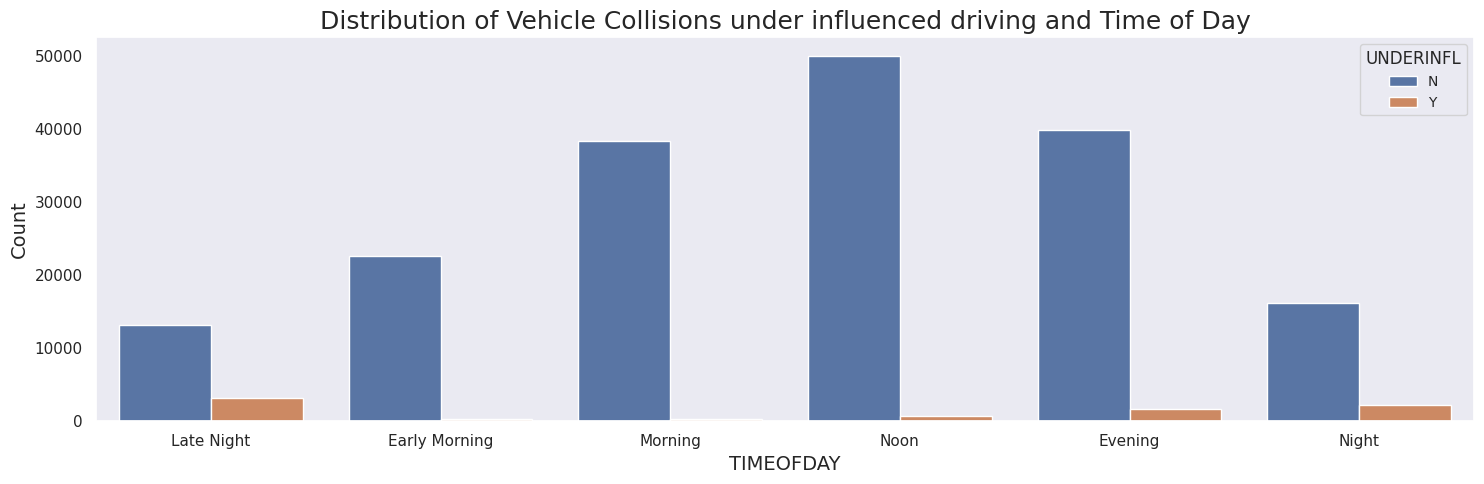

In [ ]:
# Create count plots for time of day and under influenced conditions
visualize_collision_counts(df, "TIMEOFDAY", "UNDERINFL", "Distribution of Vehicle Collisions under influenced driving and Time of Day")

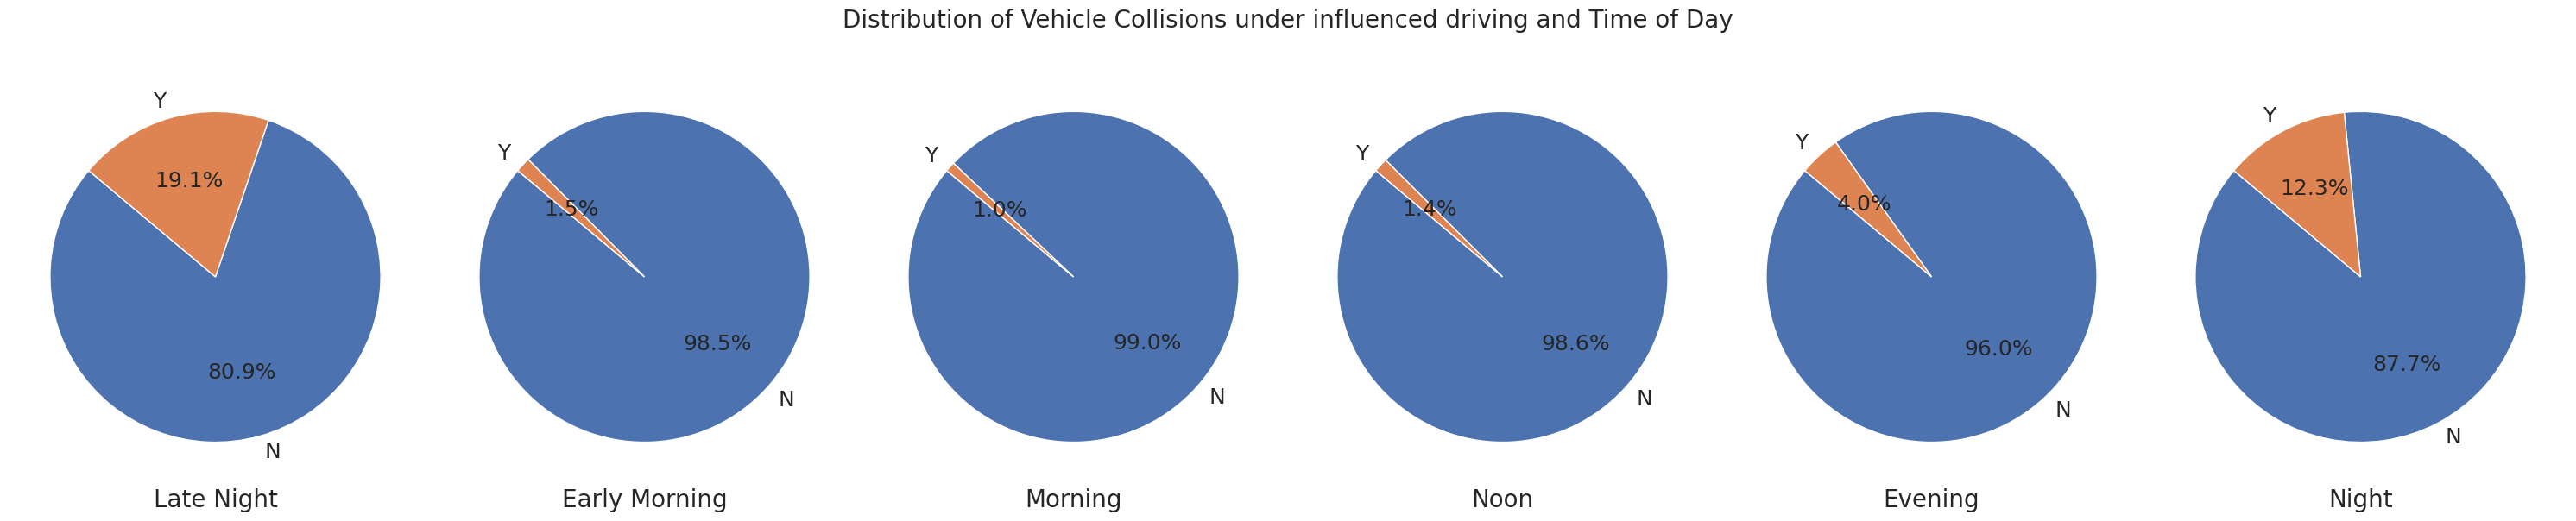

In [ ]:
visualize_collision_pie_chart(df, "TIMEOFDAY", "UNDERINFL", "Distribution of Vehicle Collisions under influenced driving and Time of Day")

- The data suggests that DUI(Driving Under Influence) collisions are most frequent at night (between 8pm and 4am).
- Compared to mornings, DUI collisions appear to be less frequent during the day.
- There might be a slight increase in DUI collisions during evenings (~2.5-3% increase).

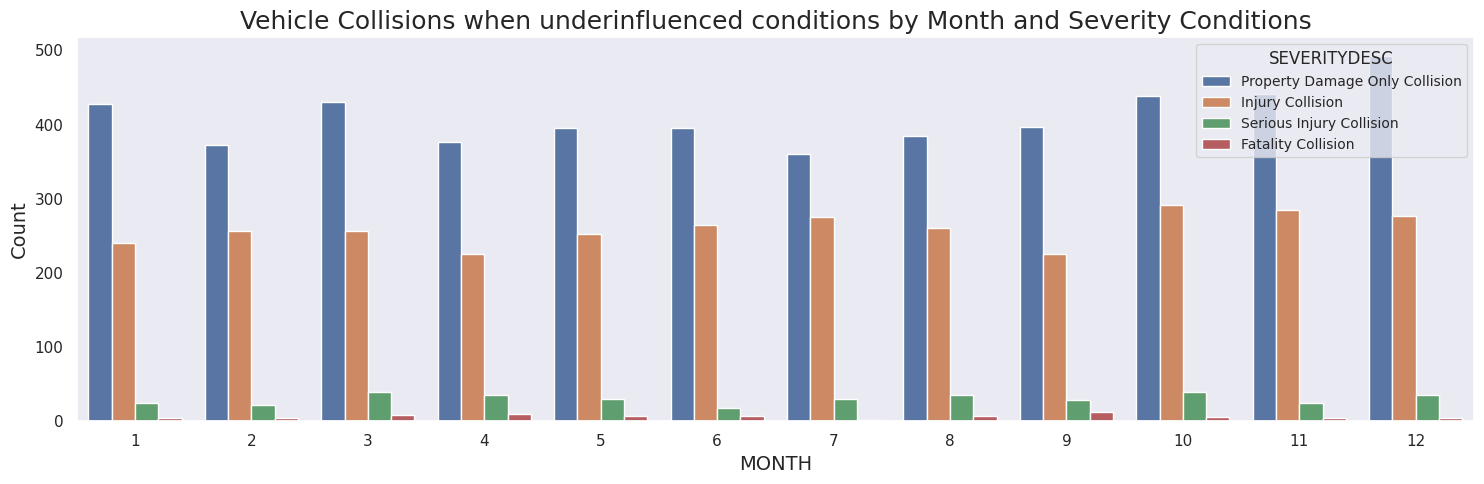

In [ ]:
visualize_collision_counts(df[df["UNDERINFL"]=="Y"], "MONTH", "SEVERITYDESC", "Vehicle Collisions when underinfluenced conditions by Month and Severity Conditions")

> The most frequent severity for collisions is Property Damage Only, followed by Injury Collisions. There are far fewer Serious Injury Collisions and Fatality Collisions.

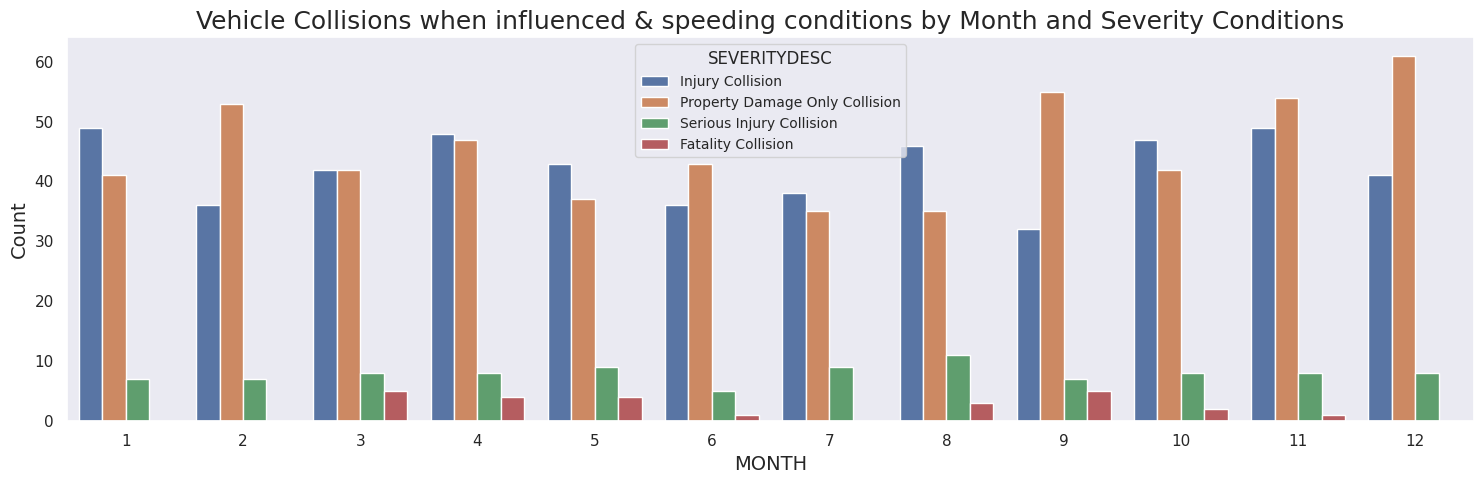

In [ ]:
visualize_collision_counts(df[(df["UNDERINFL"]=="Y") & (df["SPEEDING"]=="Y")],
                           "MONTH", "SEVERITYDESC",
                           "Vehicle Collisions when influenced & speeding conditions by Month and Severity Conditions")

> After filtering further on under influenced and speeding case of collision types, serious injuries and fatality collison are started to get noticed. This visualization highlights the potentially dangerous combination of driving under the influence and speeding.



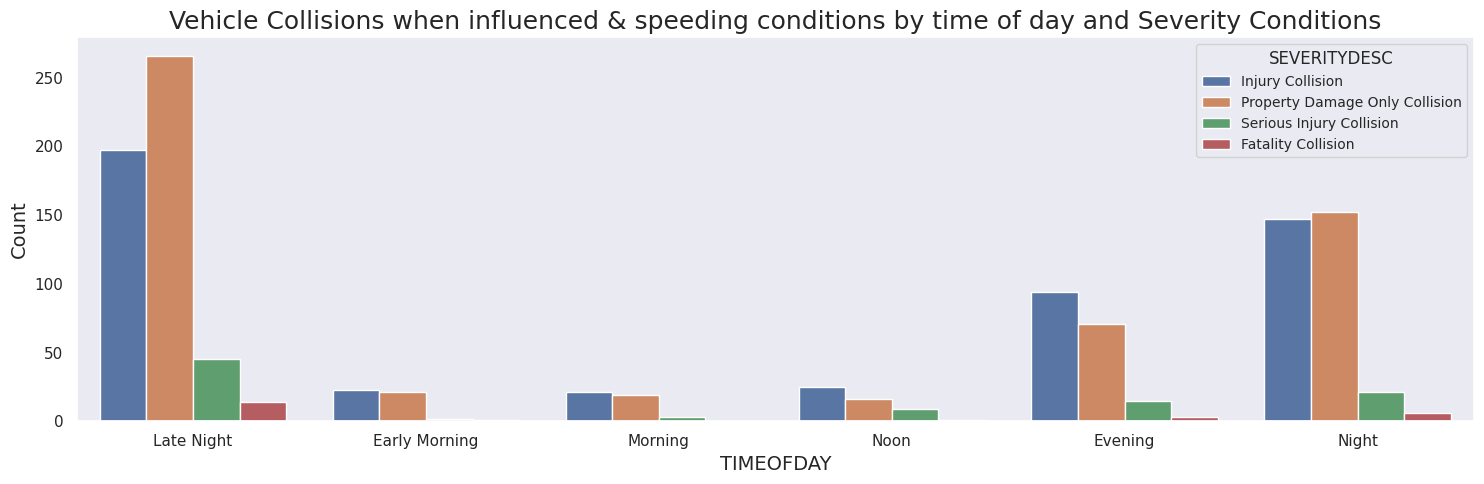

In [ ]:
visualize_collision_counts(df[(df["UNDERINFL"]=="Y") & (df["SPEEDING"]=="Y")],
                           "TIMEOFDAY", "SEVERITYDESC",
                           "Vehicle Collisions when influenced & speeding conditions by time of day and Severity Conditions")

>This visualization highlights the severity of collisions under speeding and the influence of toxins and time of day.
  - It clearly shows that a higher rate of accidents happens during night time and late-night hours, while fatalities are in the minority throughout all times of the day.
  - It is noticeable that during night time, serious injuries and fatalities are starting show in the chart.

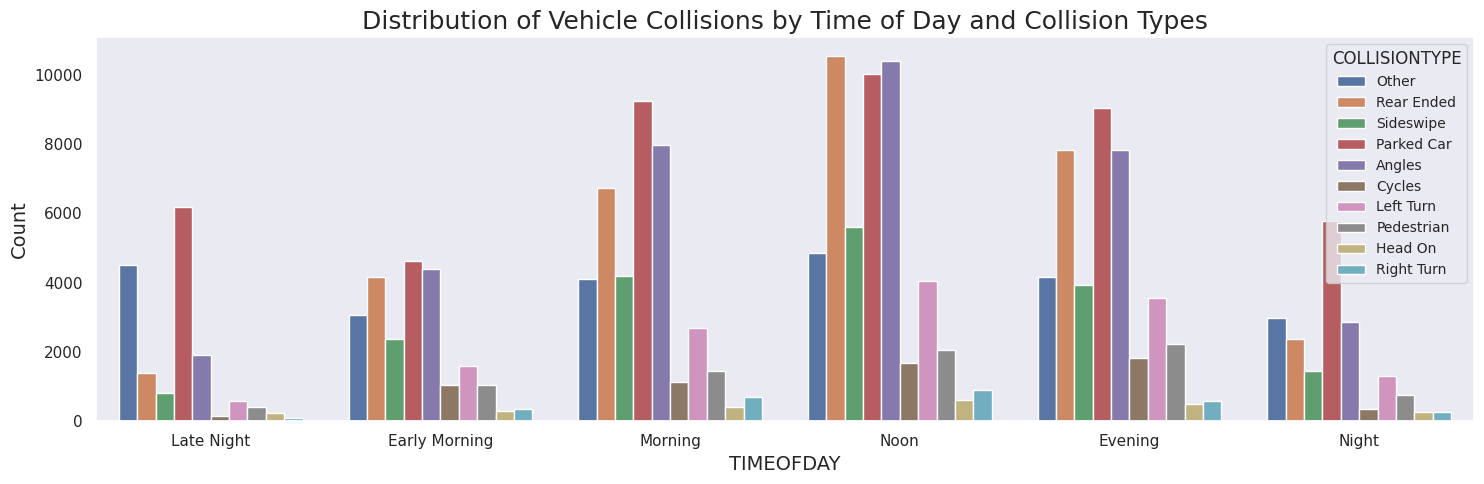

In [ ]:
# Collision types
visualize_collision_counts(df, "TIMEOFDAY", "COLLISIONTYPE", "Distribution of Vehicle Collisions by Time of Day and Collision Types")

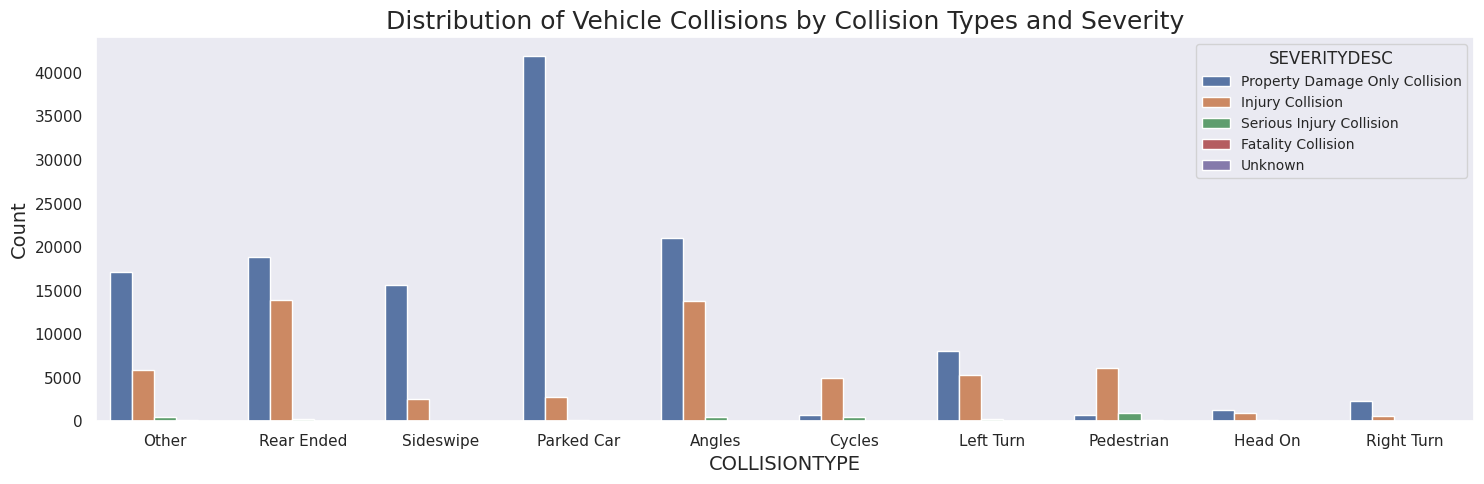

In [ ]:
visualize_collision_counts(df, "COLLISIONTYPE", "SEVERITYDESC", "Distribution of Vehicle Collisions by Collision Types and Severity")

>It appears that collisions involving property damage are most prevalent among parked cars. This could be due to illegal or careless parking, and this trend remains consistent across various times of day and collision types.

>Additionally, left turns have a higher collision rate than right turns, likely because most drivers are right-hand dominant.

>Furthermore, it is observed that many drivers do not check their rear-view mirrors, which may lead to pedestrian-related accidents causing injury.

>Head-on collisions are minimal, as indicated by both bar plots.

>Also, there is a noticeable trend in angle-related collisions from morning until evening. This could be due to drivers being preoccupied with work-related concerns during these hours, leading them to neglect proper checks of their surroundings before making turns.

>Lastly, during nighttime, there seems to be a trend in parked car, angle, and rear-end-related collisions causing property damage and injury. This could be due to lighting conditions.


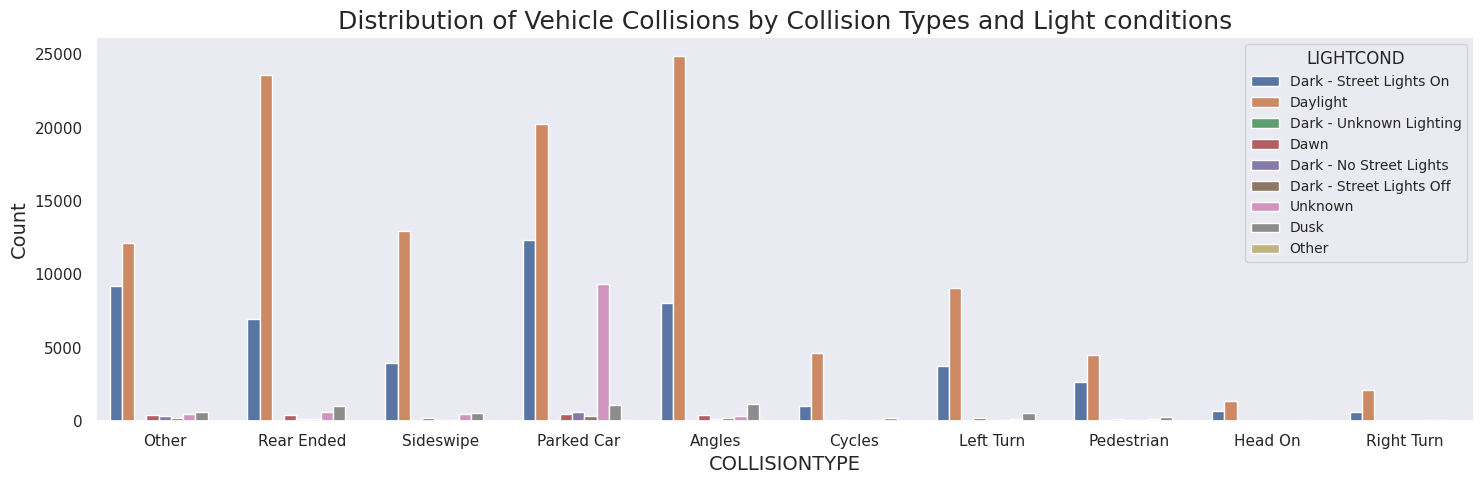

In [ ]:
visualize_collision_counts(df, "COLLISIONTYPE", "LIGHTCOND", "Distribution of Vehicle Collisions by Collision Types and Light conditions")

> Collisions with cyclists and pedestrians are more common in daylight conditions than in dark conditions.

> Daylight-related collision accidents are more common than those related to darkness. This could be because most drivers tend to work during the daytime, suggesting there are more daytime workers compared to at night.

> Lastly, there seems to be extremely few collision reports related to dark with no or off street lighting. This suggests that almost every corner of the roads has access to street lighting (but some are off, this must due to some wiring problem or technical error).

In [ ]:
df["WEATHER"].value_counts()

WEATHER
Clear                       112099
Raining                      32487
Overcast                     27950
Unknown                      12931
Other                          919
Snowing                        915
Fog/Smog/Smoke                 660
Sleet/Hail/Freezing Rain       129
Partly Cloudy                   70
Blowing Sand/Dirt               51
Severe Crosswind                29
Blowing Snow                     2
Name: count, dtype: int64

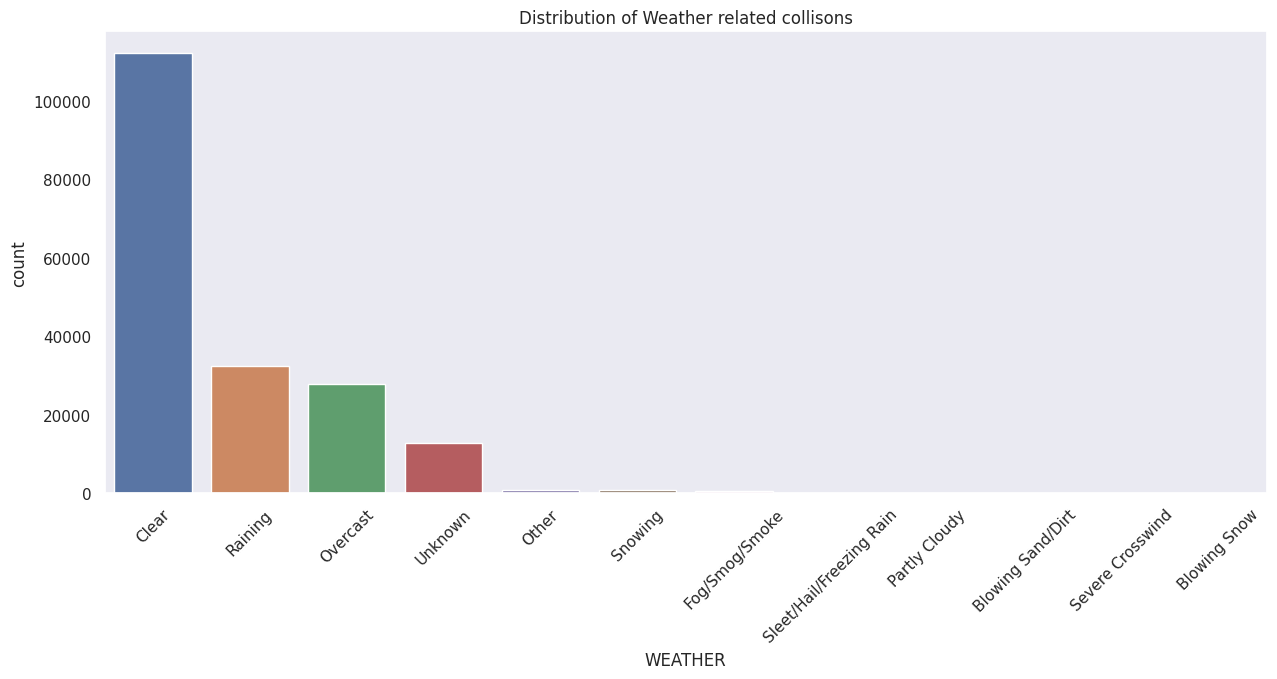

In [ ]:
plt.figure(figsize=(15, 6))
visualize_bar_plot(df["WEATHER"], "Distribution of Weather related collisons", 45)

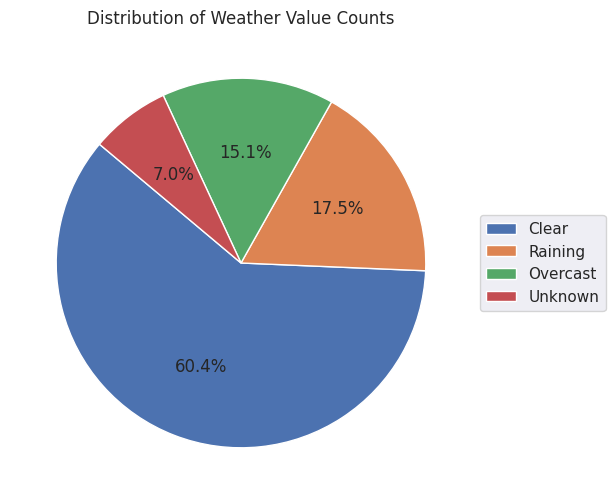

In [ ]:
# Lets take weather types that are only relevant and filter out
relevant_weather_conditions = ['Clear', 'Raining', 'Overcast', 'Unknown']
weather_df = df[df["WEATHER"].isin(relevant_weather_conditions)]

# Visualize new relevant weather conditions
visualize_pie_chart(weather_df["WEATHER"], "Distribution of Weather Value Counts")

> Overcast means meterological condition of clouds obscuring ~95% of the sky.

![Overcast Image](https://www.thoughtco.com/thmb/KBskPErWCeHss3-6-gtqKWGToOI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/GettyImages-528903279-599d1549aad52b001107054d.jpg)


In [ ]:
# Checking values on sppeding column
# print(f'\nMissing Speeding value count: {len(df)-df["SPEEDING"].value_counts()}')
df["SPEEDING"].fillna('N', inplace=True)
print(f'Speeding value count: {df["SPEEDING"].value_counts()}')

Speeding value count: SPEEDING
N    178828
Y      9695
Name: count, dtype: int64


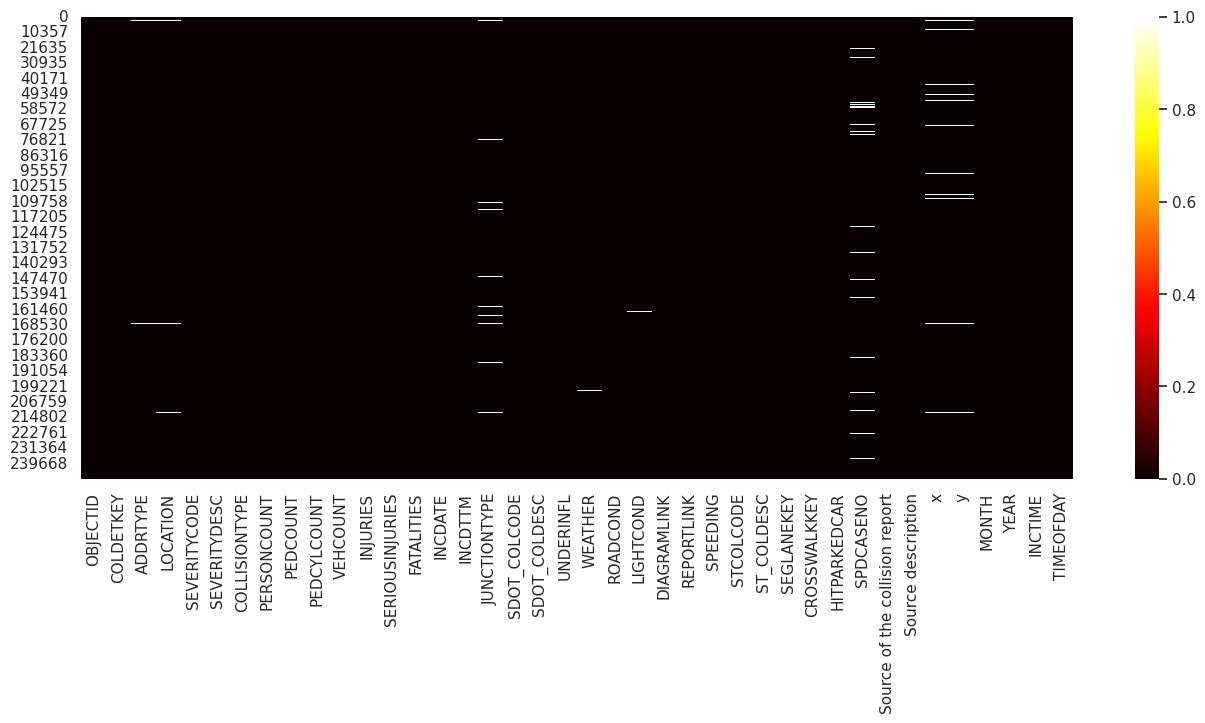

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cmap='hot')
plt.show();

In [ ]:
columns_to_remove = ["OBJECTID",      # Unique id
                     "COLDETKEY",
                     "SEGLANEKEY",
                     "CROSSWALKKEY",
                     "x", "y",        # Only needed if we need 'folium' for interactive map analysis
                     "INCDATE",       # Already splitted into INCTIME and TIMEOFDAY columns
                     "SPDCASENO",     # Unique speed case numbers
                     "REPORTLINK",
                     "DIAGRAMLINK",
                     "STCOLCODE",
                     "SDOT_COLCODE",  #	code given to the collision by SDOT
                     "SDOT_COLDESC"]  # description of the collision corresponding to the collision code
df = df.drop(columns=columns_to_remove)
print(f"Remaining {len(df.columns)} columns after removal:\n{df.columns}")

Remaining 27 columns after removal:
Index(['ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDTTM', 'JUNCTIONTYPE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLDESC',
       'HITPARKEDCAR', 'Source of the collision report', 'Source description',
       'MONTH', 'YEAR', 'INCTIME', 'TIMEOFDAY'],
      dtype='object')


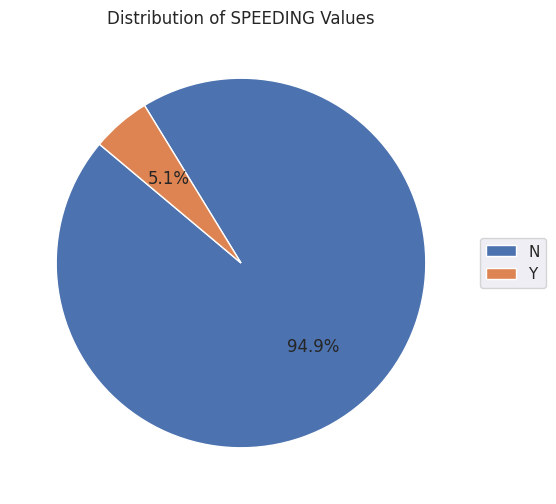

In [ ]:
# Visualization on distribution of SPEEDING Values
visualize_pie_chart(df["SPEEDING"], "Distribution of SPEEDING Values");

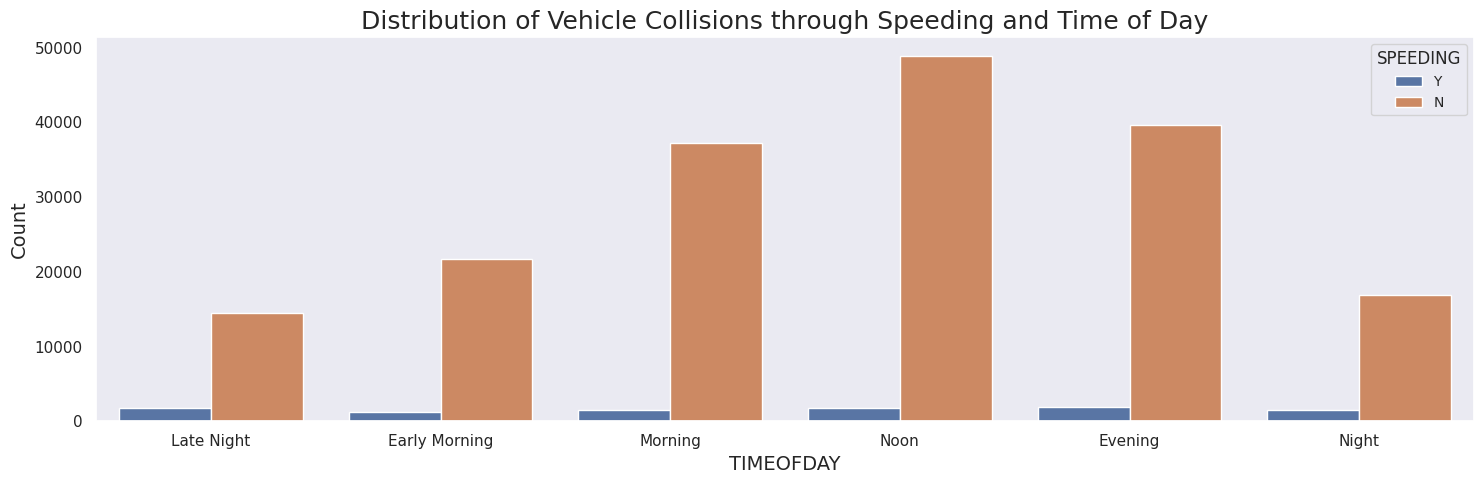

In [ ]:
visualize_collision_counts(df, "TIMEOFDAY", "SPEEDING", "Distribution of Vehicle Collisions through Speeding and Time of Day")

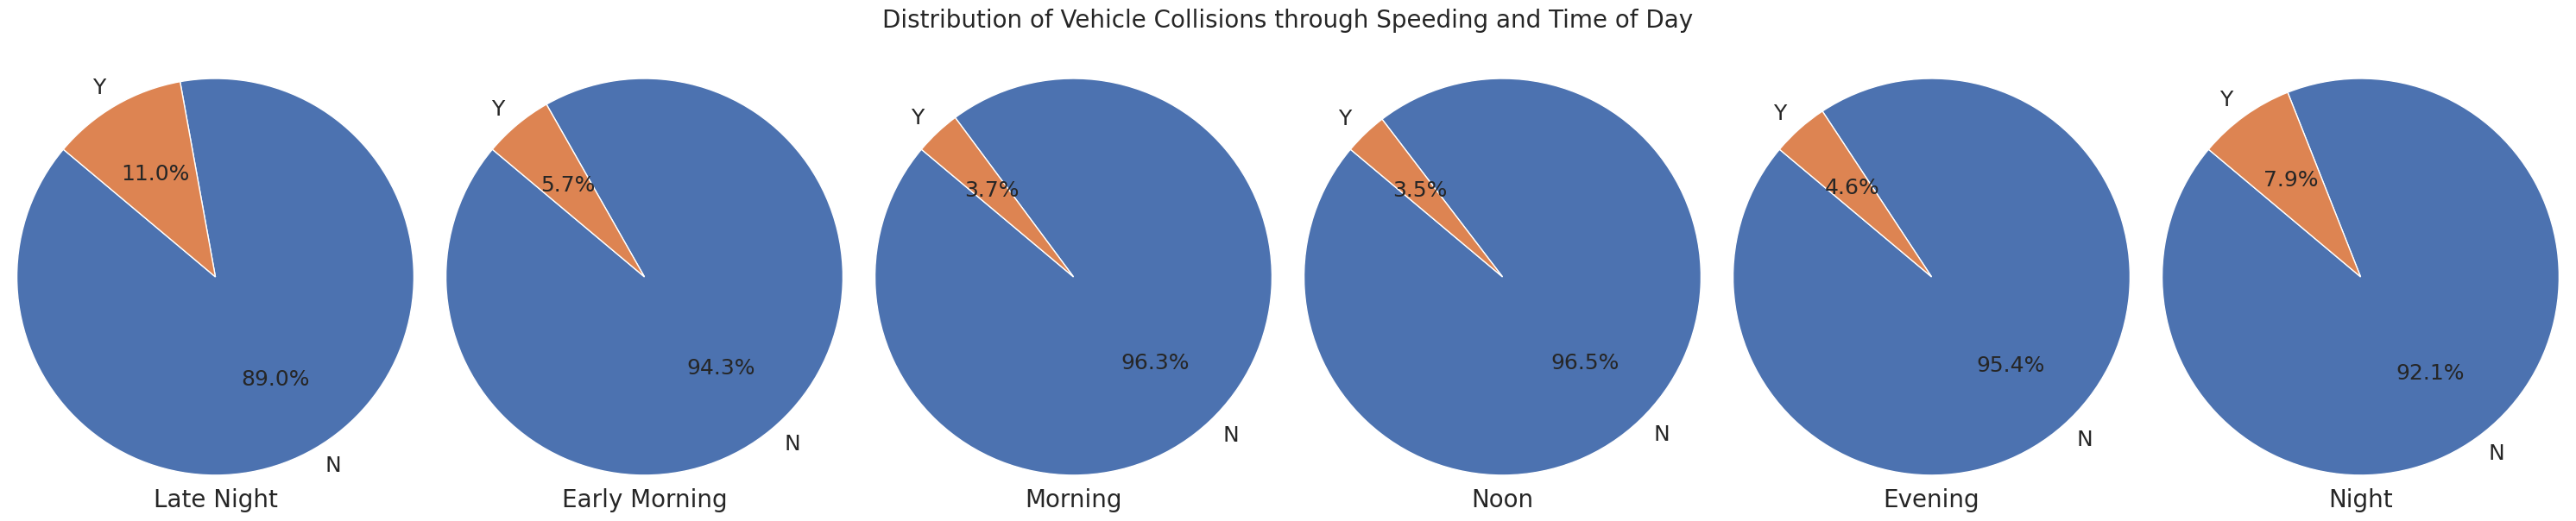

In [ ]:
visualize_collision_pie_chart(df, "TIMEOFDAY", "SPEEDING", "Distribution of Vehicle Collisions through Speeding and Time of Day", 1.2)

In [ ]:
speeding_df = df[df["SPEEDING"] == "Y"]
print("Total data when speeding = 'Y':", len(speeding_df))
speeding_df.sample(3)

Total data when speeding = 'Y': 9695


,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,LIGHTCOND,SPEEDING,ST_COLDESC,HITPARKEDCAR,Source of the collision report,Source description,MONTH,YEAR,INCTIME,TIMEOFDAY
22538,Block,SW BARTON ST BETWEEN 25TH AVE SW AND 26TH AVE SW,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,...,Dark - Street Lights On,Y,From same direction - both going straight - on...,N,PTCR,Police Traffic Collision Report,12,2005,2005-12-23 16:56:00,Noon
43961,Block,NE 135TH ST BETWEEN 12TH AVE NE AND 15TH AVE NE,1,Property Damage Only Collision,Parked Car,4,0,0,4,0,...,Dark - Street Lights On,Y,One parked--one moving,N,PTCR,Police Traffic Collision Report,8,2006,2006-08-25 00:45:00,Late Night
175397,Block,1ST AVE NE BETWEEN I5 NB 1ST AV NE OFF RP AND ...,1,Property Damage Only Collision,Angles,2,0,0,2,0,...,Daylight,Y,Entering at angle,N,PTCR,Police Traffic Collision Report,4,2016,2016-04-24 11:29:00,Morning


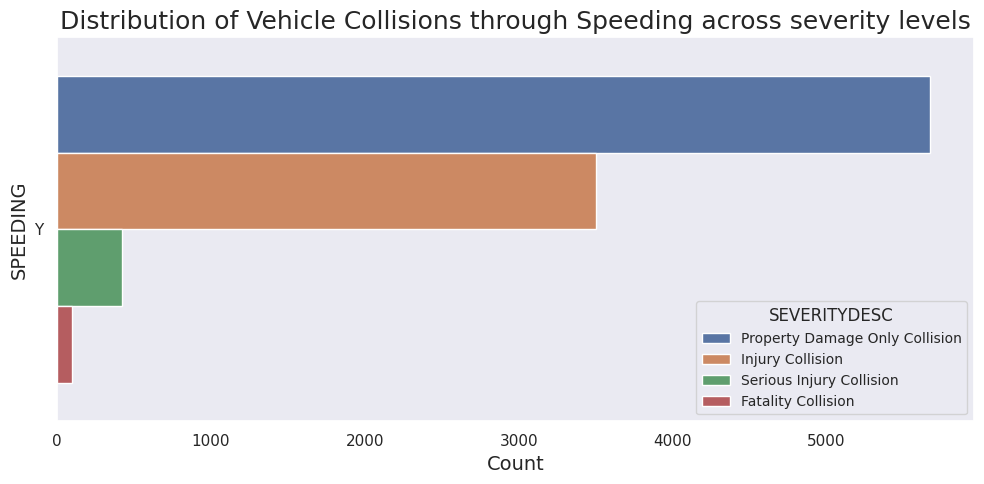

In [ ]:
visualize_collision_counts(speeding_df, "SPEEDING", "SEVERITYDESC", "Distribution of Vehicle Collisions through Speeding across severity levels", True)

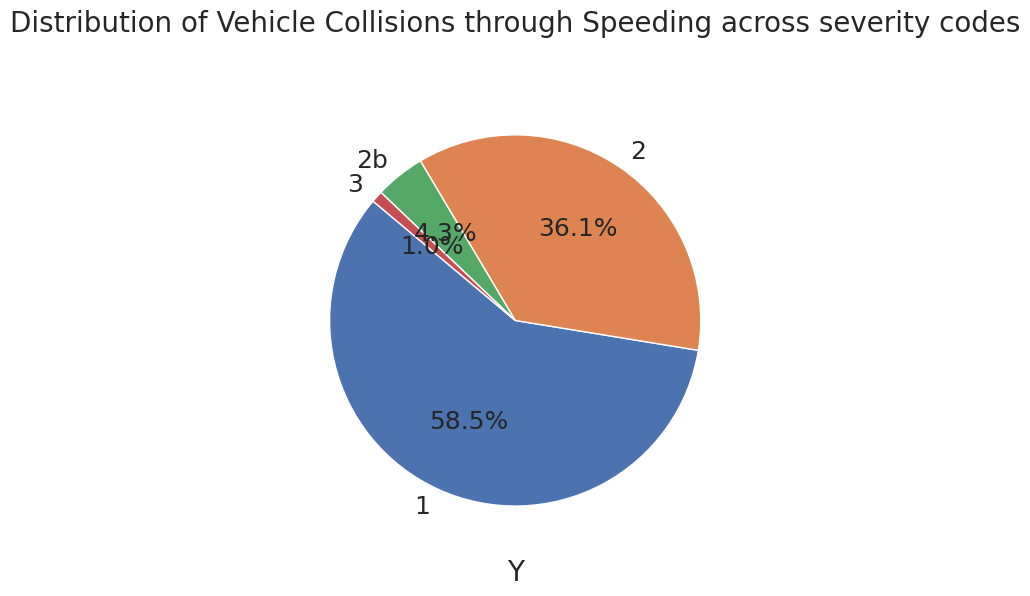

In [ ]:
visualize_collision_pie_chart(speeding_df, "SPEEDING", "SEVERITYCODE", "Distribution of Vehicle Collisions through Speeding across severity codes")

In [ ]:
df["ADDRTYPE"].value_counts()

ADDRTYPE
Block           119619
Intersection     66594
Alley              669
Name: count, dtype: int64

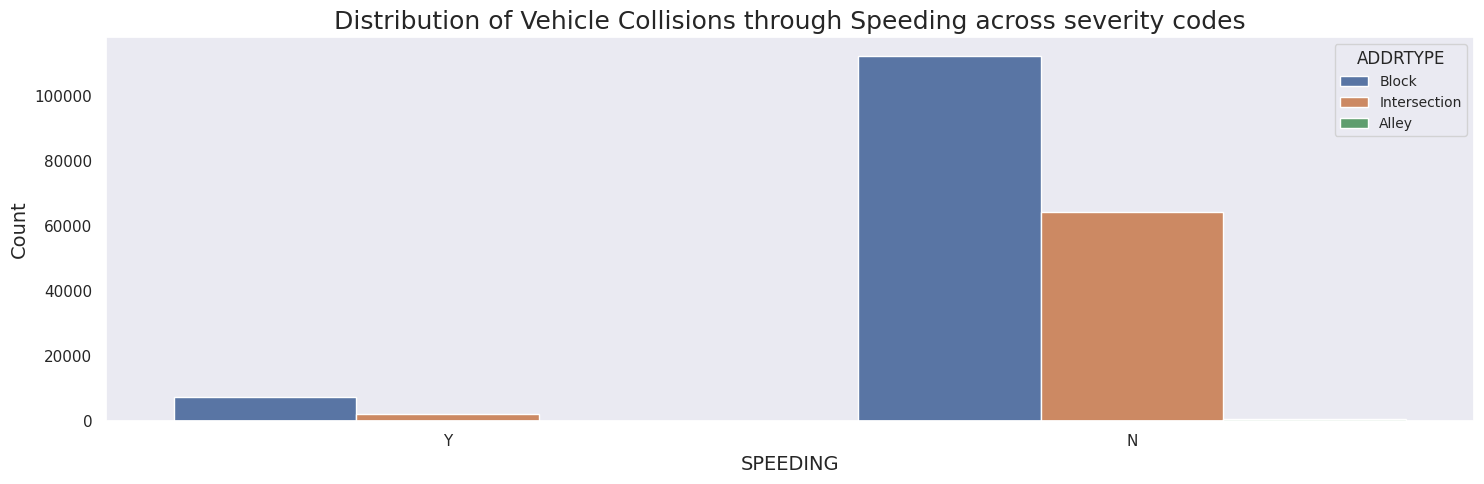

In [ ]:
visualize_collision_counts(df, "SPEEDING", "ADDRTYPE", "Distribution of Vehicle Collisions through Speeding across severity codes")

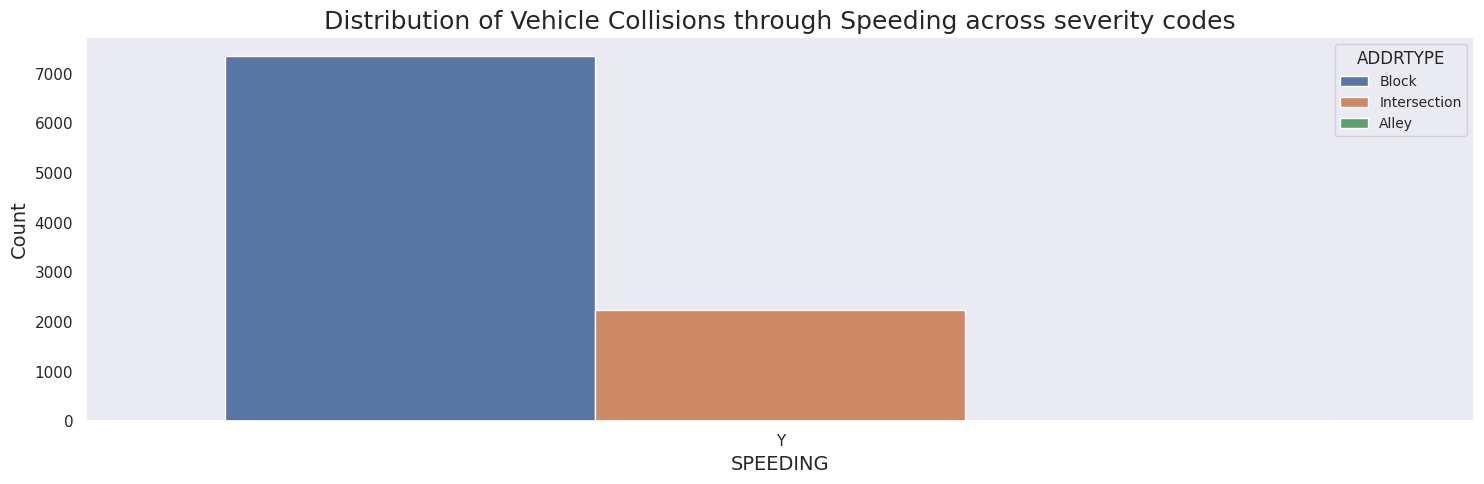

In [ ]:
visualize_collision_counts(speeding_df, "SPEEDING", "ADDRTYPE", "Distribution of Vehicle Collisions through Speeding across severity codes")

## Speeding data across 2020-2023

Total data from 2020 to 2023: 22613


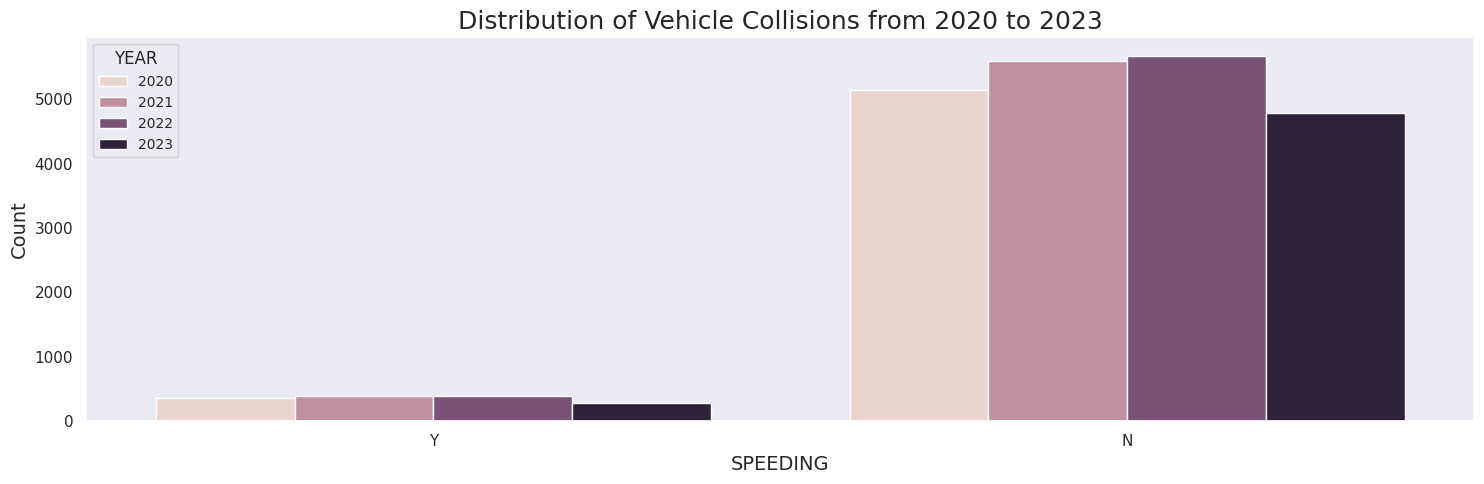

In [ ]:
df_from_2020_23 = df[(df["YEAR"] >= 2020) & (df["YEAR"] <= 2023)]
print("Total data from 2020 to 2023:", len(df_from_2020_23))

visualize_collision_counts(df_from_2020_23, "SPEEDING", "YEAR", "Distribution of Vehicle Collisions from 2020 to 2023")

Total speeding data from 2020 to 2023: 22613


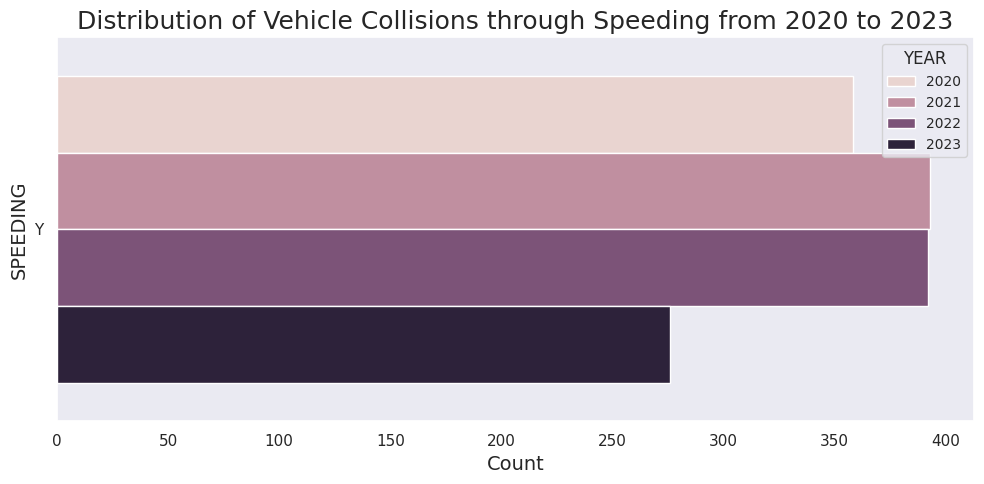

In [ ]:
speeding_df_from_2020_23 = df_from_2020_23[df_from_2020_23["SPEEDING"] == "Y"]
print("Total speeding data from 2020 to 2023:", len(df_from_2020_23))

visualize_collision_counts(speeding_df_from_2020_23, "SPEEDING", "YEAR", "Distribution of Vehicle Collisions through Speeding from 2020 to 2023", True)

In [ ]:
new_df = df_from_2020_23
new_df.describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,MONTH,YEAR,INCTIME
count,22613.000000,22613.000000,22613.000000,22613.000000,22613.000000,22613.000000,22613.000000,22613.000000,22613.000000,22613
mean,2.456507,0.060496,0.042055,1.942290,0.464954,0.038297,0.004820,6.367797,2021.472737,2021-12-17 02:16:04.043691520
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2020.000000,2020-01-01 00:25:00
25%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,2021.000000,2021-01-13 04:00:00
50%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,2021.000000,2021-12-19 20:47:00
75%,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,9.000000,2022.000000,2022-11-24 15:06:00
max,49.000000,6.000000,3.000000,14.000000,14.000000,4.000000,2.000000,12.000000,2023.000000,2023-12-27 07:42:00
std,1.175372,0.250882,0.202911,0.689491,0.728652,0.211223,0.071152,3.386337,1.087870,NaN


In [ ]:
new_df['PERSONCOUNT'].median(),   # Median of no of people involved in the accident
new_df['YEAR'].median()           # Median of coliison year

2021.0

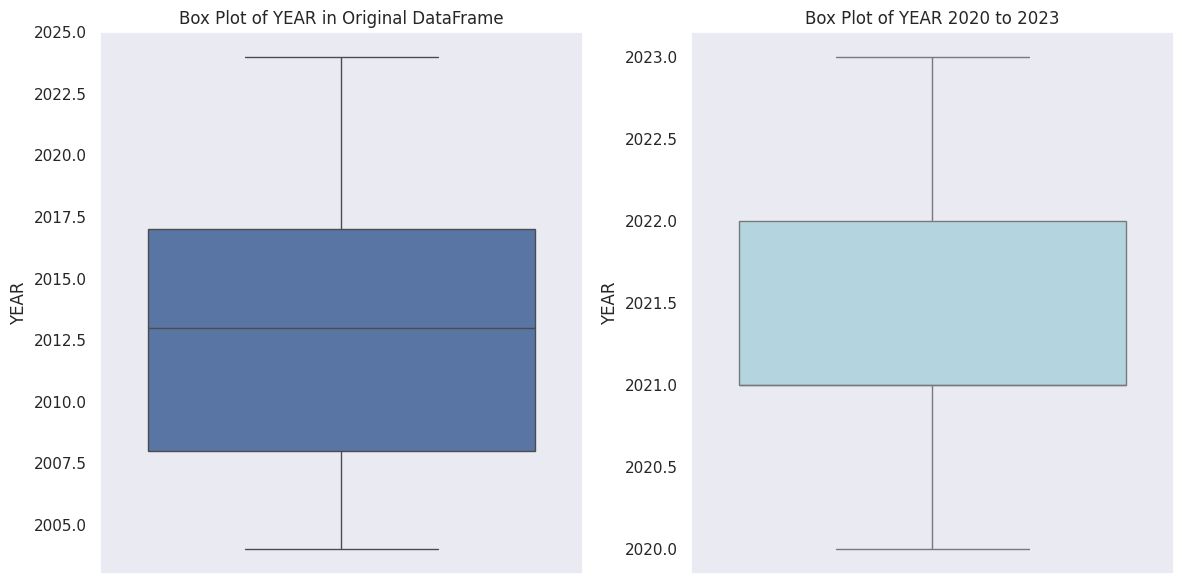

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, y='YEAR', ax=axes[0])
axes[0].set_title('Box Plot of YEAR in Original DataFrame')

sns.boxplot(data=new_df, y='YEAR', ax=axes[1], color="lightblue")
axes[1].set_title('Box Plot of YEAR 2020 to 2023')

plt.tight_layout()
plt.show();

In [ ]:
df["SEVERITYCODE"].value_counts()

SEVERITYCODE
1     127845
2      56889
2b      3388
3        395
0          5
Name: count, dtype: int64

| Prev Severity Code | New Severity Code | Description         |
|--------------------|-------------------|---------------------|
| 3                  | 4                 | Fatality            |
| 2b                 | 3                 | Serious Injury      |
| 2                  | 2                 | Injury              |
| 1                  | 1                 | Property Damage     |
| 0                  | 0                 | Unknown             |

In [ ]:
def for_severitycode(x):
  severity_mapping = {'0': 0, '1': 1, '2': 2, '2b': 3}
  return severity_mapping.get(x, 4)

df["SEVERITYCODE"] = df["SEVERITYCODE"].apply(for_severitycode)
df["SEVERITYCODE"].value_counts()

SEVERITYCODE
1    127845
2     56889
3      3388
4       396
0         5
Name: count, dtype: int64

In [ ]:
df["SPEEDING"] = df["SPEEDING"].apply(lambda x: 1 if x == "Y" else 0)
df["SPEEDING"].value_counts()

SPEEDING
0    178828
1      9695
Name: count, dtype: int64

## 7. Chi-square Test & Normality Hypothesis Tests

In [ ]:
from scipy.stats import chi2_contingency, kstest, shapiro

def chisquare_test(df, df_column, alpha = 0.05):
  """
  Performs Chi-squared test on a given data sample.
  """
  cross_tab = pd.crosstab(df[df_column], df['SEVERITYCODE'])
  chi2_stat, pvalue, dof, expected = chi2_contingency(cross_tab)

  if pvalue <= alpha:
    print(f"There is a statistically significant relationship between {df_column} & SEVERITYCODE")
  else:
    print(f"There is no statistically significant relationship between {df_column} & SEVERITYCODE")
  return chi2_stat, pvalue, expected


def hypothesis_test(df_column, alpha = 0.05):
  """
  Performs normality test on a given data sample.
  """
  n_samples = df_column.value_counts().sum()
  if n_samples < 100:
    statistics, pvalue = shapiro(df_column)
  else:
    statistics, pvalue = kstest(df_column, 'norm')

  if pvalue <= alpha:
    print("Sample does not look Gaussian(normal) distribution | Reject H0 & Accept H1")
  else:
    print("Sample looks Gaussian(normal) distribution | Accept H0")
  return pvalue, statistics

In [ ]:
filtered_chi_squared_columns = ['ADDRTYPE', 'COLLISIONTYPE', 'UNDERINFL',
                                'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
                                'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
                                'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
                                'MONTH', 'YEAR']

for filter in filtered_chi_squared_columns:
  print(f"Chi-square test result for {filter}:")
  # Execute Chi-squared test
  chi2_stat, pvalue, expected = chisquare_test(df, filter)
  print(f"Chi-square statistics: {chi2_stat:.4f}")
  print(f"P-value: {pvalue}\n")

Chi-square test result for ADDRTYPE:
There is a statistically significant relationship between ADDRTYPE & SEVERITYCODE
Chi-square statistics: 7447.1202
P-value: 0.0

Chi-square test result for COLLISIONTYPE:
There is a statistically significant relationship between COLLISIONTYPE & SEVERITYCODE
Chi-square statistics: 46538.9388
P-value: 0.0

Chi-square test result for UNDERINFL:
There is a statistically significant relationship between UNDERINFL & SEVERITYCODE
Chi-square statistics: 757.6243
P-value: 6.702243414336026e-164

Chi-square test result for WEATHER:
There is a statistically significant relationship between WEATHER & SEVERITYCODE
Chi-square statistics: 5003.6054
P-value: 0.0

Chi-square test result for ROADCOND:
There is a statistically significant relationship between ROADCOND & SEVERITYCODE
Chi-square statistics: 4992.0785
P-value: 0.0

Chi-square test result for LIGHTCOND:
There is a statistically significant relationship between LIGHTCOND & SEVERITYCODE
Chi-square statistic

In [ ]:
filtered_hypothesis_columns = ['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
                               'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
                               'MONTH', 'YEAR']

for filter in filtered_hypothesis_columns:
  print(f"Test for normality result for {filter}:")
  # Execute Hypothesis test
  pvalue, statistics = hypothesis_test(df[filter])
  print(f"Kolmogorov-Smirnov test p-value: {pvalue}\n")

Test for normality result for PERSONCOUNT:
Sample does not look Gaussian(normal) distribution | Reject H0 & Accept H1
Kolmogorov-Smirnov test p-value: 0.0

Test for normality result for PEDCOUNT:
Sample does not look Gaussian(normal) distribution | Reject H0 & Accept H1
Kolmogorov-Smirnov test p-value: 0.0

Test for normality result for PEDCYLCOUNT:
Sample does not look Gaussian(normal) distribution | Reject H0 & Accept H1
Kolmogorov-Smirnov test p-value: 0.0

Test for normality result for VEHCOUNT:
Sample does not look Gaussian(normal) distribution | Reject H0 & Accept H1
Kolmogorov-Smirnov test p-value: 0.0

Test for normality result for INJURIES:
Sample does not look Gaussian(normal) distribution | Reject H0 & Accept H1
Kolmogorov-Smirnov test p-value: 0.0

Test for normality result for SERIOUSINJURIES:
Sample does not look Gaussian(normal) distribution | Reject H0 & Accept H1
Kolmogorov-Smirnov test p-value: 0.0

Test for normality result for FATALITIES:
Sample does not look Gaussi

## 8. Pearson Correlation Tests

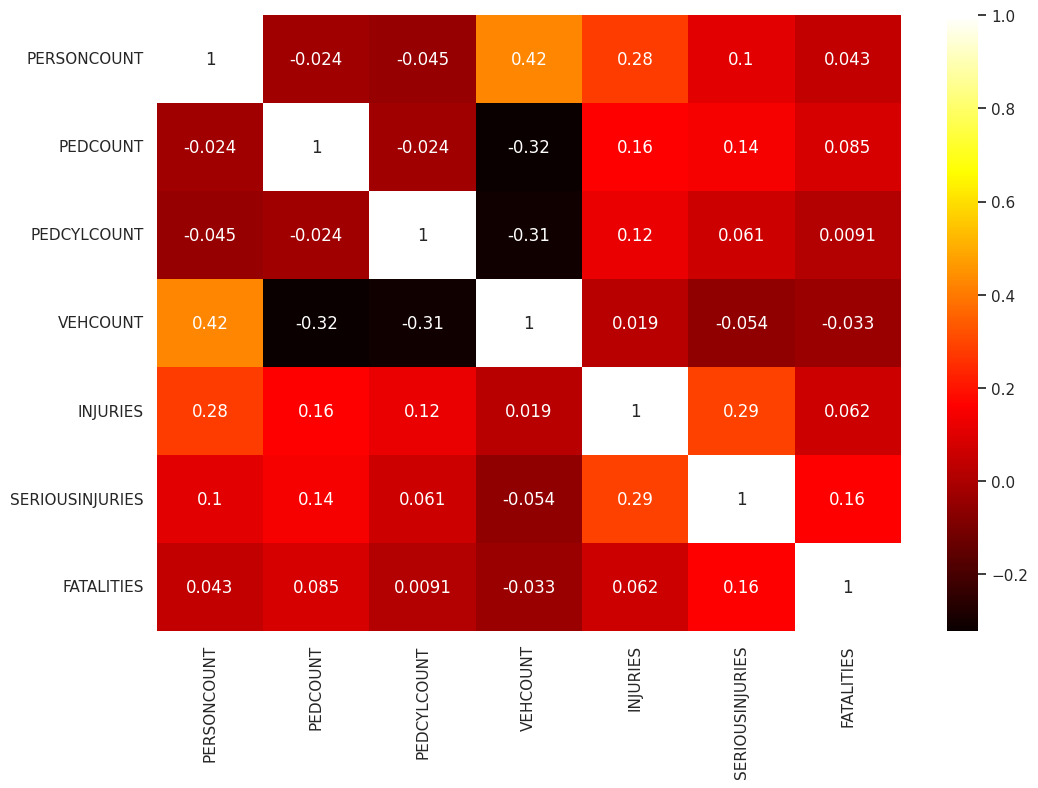

In [ ]:
columns_of_interest=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT',
                     'VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES']

plt.figure(figsize = (12, 8))
sns.heatmap(df[columns_of_interest].corr(), cmap = 'hot', annot = True)
plt.show()

From above correlation we can get following insights:

**Positive correlation:**

*A positive correlation means they tend to move in the same direction (up together, down together)*

> **Person Count and Vehicle Count:** A higher number of people is associated with a higher number of vehicles. This makes sense as more people likely means more traffic activity.

> **Injuries and Serious Injuries:** Collisions resulting in injuries are also more likely to result in serious injuries.

> **Serious Injuries and Fatalities:** Collisions with serious injuries are more likely to result in fatalities.

**Negative correlation:**

*A negative correlation means they move in opposite directions (one goes up, the other goes down).*

> **Person Count and Pedestrian Count:** More people on the road (including drivers) are associated with fewer pedestrians. This could be because:
  - Traffic volume discourages walking due to safety concerns or a lack of pedestrian infrastructure.
  - The correlation reflects areas with different purposes. Places with high person counts might be commercial areas where people drive to, whereas areas with high pedestrian counts might be residential areas where people walk more.

> **Vehicle Count and Cyclist Count:** Similar to pedestrians, cyclists might be discouraged by higher traffic volume.

> _**NOTE:** It's important to note that correlation doesn't imply causation(cause and effect). Just because two factors appear related doesn't necessarily mean one causes the other. There could be other factors influencing both._


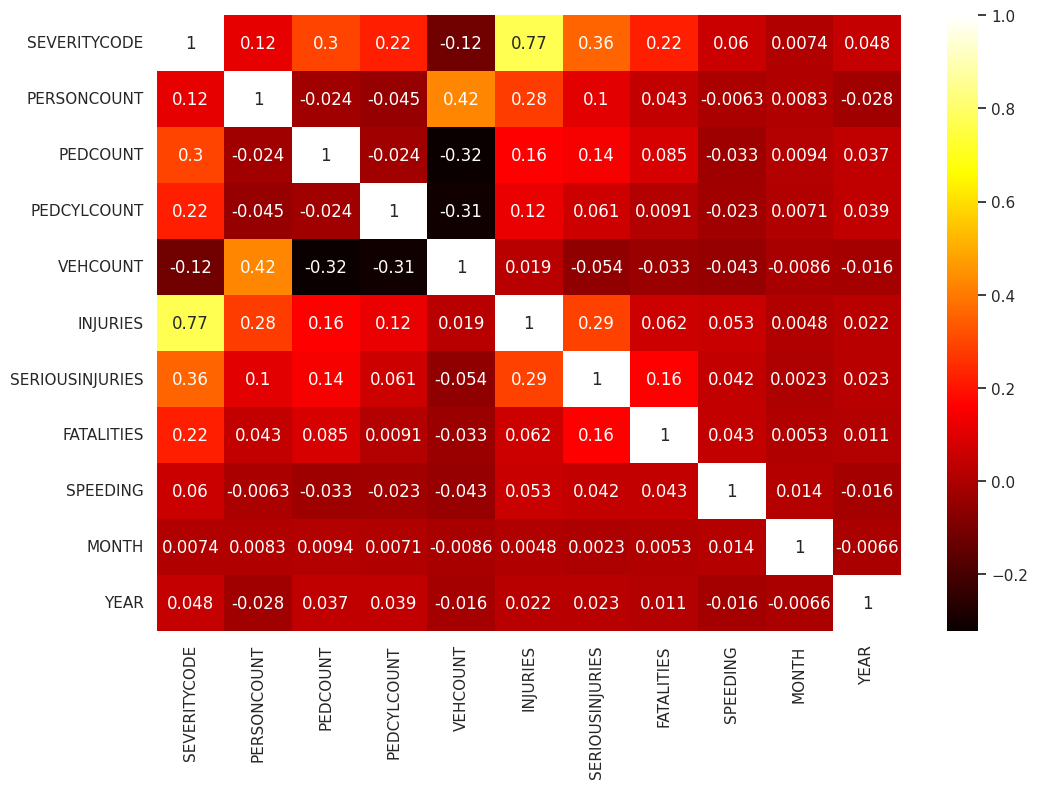

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.select_dtypes('number').corr(), cmap = 'hot', annot = True)
plt.show()

>**NOTE:**
- 0(Darkest) represents the lower correlation values which indicates weaker realtionships or -ve relationships.
-1(Lightest) represents the higher correlation values which indicates higher relationships or +ve relationships.

> A light-colored cell between "injuries" and "serious injuries" indicates a strong positive correlation,
suggesting that collisions with injuries often lead to serious injuries.

## 9. Summarization

> TODO ---------------